In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# Importing the first CSV file into a DataFrame
df1 = pd.read_excel(r'2021-2023 Orders Report_Client Level.xlsx', sheet_name='data')

# Importing the second CSV file into another DataFrame
df2 = pd.read_excel(r'TimesheetPortal-Report-uOM 1.xlsx')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data Pre-processing 

In [4]:
df1.head()

,Year,Month,Client Name,Order Intake (EUR)
0,2021,February,Psi Bridge Consultants,0.8784
1,2021,March,Psi Bridge Consultants,0.0060
2,2021,April,Psi Bridge Consultants,0.0049
3,2021,May,Psi Bridge Consultants,0.0019
4,2021,June,Psi Bridge Consultants,0.0014


In [5]:
unique_project_count = df1['Client Name'].nunique()
print("Number of unique projects:", unique_project_count)

Number of unique projects: 50


In [6]:
df2.head()

,Date,Employee_name,Department,Job Title,Project_name,Task_name,Work quantity,Rate code,Units
0,2021-01-01,Iyla Colon,INDUSTRIAL MAINTENANCE,SHIFT TEAM LEADER,COVER SHIFTS,Shift Operation Technician - Day Rate,1.0,STD_DAILY,Days
1,2021-01-01,Bruce Murray,DATA & SECURITY,SENIOR PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,1.0,STD_DAILY,Days
2,2021-01-01,Andy Cline,INDUSTRIAL MAINTENANCE,MECHANICAL TECHNICIAN,SHIFT & O&M ADDITIONAL,HOCA,1.0,STD_DAILY,Days
3,2021-01-01,Lina McCoy,"QUALITY, SAFETY & ENVIRONMENT",DIRECTOR FOR H&S,SPECIFICS,Annual Leave,8.0,STD,Hours
4,2021-01-01,Jett Austin,PROJECT MANAGEMENT,SITE MANAGER,SPECIFICS,Annual Leave,7.0,STD,Hours


In [7]:
unique_project_count = df2['Project_name'].nunique()
print("Number of unique projects:", unique_project_count)

Number of unique projects: 72


In [8]:
df2['Project_name'].value_counts()

Project_name
SPECIFICS                       44421
Beta Top Corporation            40323
Omega Zenith Futures            24083
OPERATIVE ADDITIONS             21624
Upsilon Doorway Ventures        19320
SUPPORT & MANAGEMENT            16708
Phi Apex Group                  13734
CRM                             11190
Epsilon Top Technologies         7093
Lambda Keystone Concepts         5965
Zeta Capstone Futures            2382
SALES & DEVELOPMENT              2157
Alpha Apex Networks              2083
Zeta Nexus Industries            2000
SHIFT & O&M ADDITIONAL           1990
Xi Apex Innovations              1727
SERVICE & MAINTENANCE            1727
Iota Capstone Innovations        1677
Chi Summit Technologies          1523
Upsilon Gateway Systems          1456
Omicron Portal Industries        1155
Epsilon Keystone Consultants     1049
Alpha Gateway Ventures           1035
AGENCY                           1033
Upsilon Bridge Associates        1011
Alpha Gateway Networks            983

In [9]:
btc = df2[df2['Project_name']=='Beta Top Corporation']
btc.head()

,Date,Employee_name,Department,Job Title,Project_name,Task_name,Work quantity,Rate code,Units
1,2021-01-01,Bruce Murray,DATA & SECURITY,SENIOR PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,1.0,STD_DAILY,Days
28,2021-01-01,Alison Good,"QUALITY, SAFETY & ENVIRONMENT",H&S MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours
29,2021-01-01,Davian Dudley,COMMERCIAL,SENIOR COMMERCIAL MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours
181,2021-01-02,Jordan Ray,PROJECT MANAGEMENT,PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,1.0,STD_DAILY,Days
183,2021-01-03,Jordan Ray,PROJECT MANAGEMENT,PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,1.0,STD_DAILY,Days


In [10]:
btc_operative = btc[btc['Department'] == 'OPERATIVE']
job_title_value_counts = btc_operative['Job Title'].value_counts()
print(job_title_value_counts)

Job Title
ELECTRICIAN              3770
CHARGEHAND               2687
PIPEFITTER WELDER        1344
FOREMAN                  1335
ENERGY MARSHALL          1240
ELECTRICAL APPRENTICE     579
FOREMAN / SUPERVISOR      402
SITE SUPERVISOR           157
ELECTRICAL SUPERVISOR       3
Name: count, dtype: int64


In [11]:
df2['Units'].unique()

array(['Days', 'Hours', 'MILES'], dtype=object)

Calculating Total order intake for each project

In [12]:
# Grouping the DataFrame by 'Client Name' and summing up the 'Order Intake (EUR)' for each client
total_order_intake_by_client = df1.groupby('Client Name')['Order Intake (EUR)'].sum().reset_index()

# Renaming the column
total_order_intake_by_client.rename(columns={'Order Intake (EUR)': 'Total Order Intake'}, inplace=True)

# Order the DataFrame by 'Total Order Intake' in descending order
total_order_intake_by_client = total_order_intake_by_client.sort_values(by='Total Order Intake', ascending=False)

# Printing the resulting DataFrame
total_order_intake_by_client.head(10)


,Client Name,Total Order Intake
1,Beta Top Corporation,339309.3941
23,Phi Apex Group,234114.1426
20,Omega Zenith Futures,219983.2916
43,Upsilon Doorway Ventures,48501.7941
35,ST.S Green,28319.3619
14,LT Gies,13578.1878
44,Xi Apex Innovations,7309.3726
48,Zeta Nexus Industries,5255.3572
10,Iota Capstone Innovations,5082.9005
3,Chi Summit Technologies,2785.9621


In [13]:
# Assuming 'Client Name' is the common column between the two DataFrames
df3 = pd.merge(df2, total_order_intake_by_client, how='inner', left_on='Project_name', right_on='Client Name')

# Printing the resulting merged DataFrame
df3.head()

,Date,Employee_name,Department,Job Title,Project_name,Task_name,Work quantity,Rate code,Units,Client Name,Total Order Intake
0,2021-01-01,Bruce Murray,DATA & SECURITY,SENIOR PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,1.0,STD_DAILY,Days,Beta Top Corporation,339309.3941
1,2021-01-01,Alison Good,"QUALITY, SAFETY & ENVIRONMENT",H&S MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,Beta Top Corporation,339309.3941
2,2021-01-01,Davian Dudley,COMMERCIAL,SENIOR COMMERCIAL MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,Beta Top Corporation,339309.3941
3,2021-01-01,Brecken Butler,INDUSTRIAL MAINTENANCE,MECHANICAL SUPERVISOR,Lambda Keystone Concepts,XE-H-OM,8.0,STD,Hours,Lambda Keystone Concepts,-39220.7417
4,2021-01-01,Athena Griffith,INDUSTRIAL MAINTENANCE,SHIFT TEAM LEADER,Lambda Keystone Concepts,XE-H-OM,12.5,STD,Hours,Lambda Keystone Concepts,-39220.7417


In [14]:
unique_project_count = df3['Project_name'].nunique()
print("Number of unique projects:", unique_project_count)

Number of unique projects: 42


Converting the duration_hours from days to hours (1 day = 8 hours )

In [15]:
df3['Units'].unique()

array(['Days', 'Hours'], dtype=object)

In [16]:
# Create a dictionary to store conversion factors for each unit to hours
unit_to_hours = {
    'Days': 8,  # Assuming 1 day = 8 hours
    'Hours': 1,  # Assuming 1 hour = 1 hour
    # Add more units and their conversion factors as needed
}

# Convert 'Work quantity' to hours based on the units
df3['Work quantity'] = df3['Work quantity'] * df3['Units'].map(unit_to_hours)

# Convert 'Units' to hours
df3['Units'] = 'Hours'

# Printing the updated DataFrame
df3.head()

,Date,Employee_name,Department,Job Title,Project_name,Task_name,Work quantity,Rate code,Units,Client Name,Total Order Intake
0,2021-01-01,Bruce Murray,DATA & SECURITY,SENIOR PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,8.0,STD_DAILY,Hours,Beta Top Corporation,339309.3941
1,2021-01-01,Alison Good,"QUALITY, SAFETY & ENVIRONMENT",H&S MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,Beta Top Corporation,339309.3941
2,2021-01-01,Davian Dudley,COMMERCIAL,SENIOR COMMERCIAL MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,Beta Top Corporation,339309.3941
3,2021-01-01,Brecken Butler,INDUSTRIAL MAINTENANCE,MECHANICAL SUPERVISOR,Lambda Keystone Concepts,XE-H-OM,8.0,STD,Hours,Lambda Keystone Concepts,-39220.7417
4,2021-01-01,Athena Griffith,INDUSTRIAL MAINTENANCE,SHIFT TEAM LEADER,Lambda Keystone Concepts,XE-H-OM,12.5,STD,Hours,Lambda Keystone Concepts,-39220.7417


In [17]:
# Drop the 'Client Name' column
df3.drop(columns=['Client Name'], inplace=True)

In [18]:
total_order_intake_by_client.head()

,Client Name,Total Order Intake
1,Beta Top Corporation,339309.3941
23,Phi Apex Group,234114.1426
20,Omega Zenith Futures,219983.2916
43,Upsilon Doorway Ventures,48501.7941
35,ST.S Green,28319.3619


## Feature Engineering 

#### unique_projects_df

1. Calculate the duration of each project in hours.
2. Group the DataFrame by 'Project_name' to get unique projects.
3. Aggregate the total order intake for each project.
4. Calculate the number of unique departments for each project.
5. Combine all the above information into the unique_projects_df.

In [19]:
# Step 1: Calculate duration of each project in hours
df3['Duration_hours'] = df3.groupby('Project_name')['Work quantity'].transform('sum')

# Step 2: Group by 'Project_name' to get unique projects
unique_projects = df3.groupby('Project_name').first().reset_index()

# Step 3: Merge total order intake by project name
unique_projects = pd.merge(unique_projects, total_order_intake_by_client, left_on='Project_name', right_on='Client Name', how='left')

# Step 4: Calculate the number of unique departments for each project
num_of_departments = df3.groupby('Project_name')['Department'].nunique().reset_index()
num_of_departments.columns = ['Project_name', 'Num_of_Departments']

# Step 5: Combine all the information into the unique_projects_df
unique_projects_df = pd.merge(unique_projects[['Project_name', 'Duration_hours', 'Total Order Intake_x']], num_of_departments, on='Project_name')

unique_projects_df = unique_projects_df.rename(columns={'Total Order Intake_x': 'Total_order_intake'})

# Step 6: Calculate project duration ( in days)
df3['Date'] = pd.to_datetime(df3['Date'])  # Convert 'Date' column to datetime
project_duration = df3.groupby('Project_name')['Date'].agg(['min', 'max']).reset_index()
project_duration['Duration_days'] = (project_duration['max'] - project_duration['min']).dt.days

# Step 7: Merge project duration
unique_projects_df = unique_projects_df.merge(project_duration, on='Project_name', how='left')

# Step 8: Add column project ID to unique_projects_df
unique_projects_df.insert(0, 'Project_ID', range(1, len(unique_projects_df) + 1))

# Display unique_projects_df
unique_projects_df.head(10)

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,min,max,Duration_days
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,2022-04-11,2024-02-14,674
1,2,Beta Top Corporation,284691.0,339309.3941,15,2021-01-01,2024-02-21,1146
2,3,Chi Gateway Consultants,126.0,15.8268,2,2021-01-19,2024-02-01,1108
3,4,Chi Summit Technologies,9532.0,2785.9621,9,2021-01-04,2024-02-21,1143
4,5,Epsilon Apex Partners,4907.0,602.0486,6,2021-01-04,2022-10-14,648
5,6,Epsilon Keystone Consultants,7601.5,1710.8408,3,2021-01-04,2023-09-15,984
6,7,Epsilon Pathway Strategies,21.0,7.5567,2,2023-11-15,2024-02-06,83
7,8,Gamma Arch Strategies,307.5,-86.8621,2,2021-07-05,2021-07-26,21
8,9,Iota Capstone Innovations,7795.0,5082.9005,11,2022-11-29,2024-02-23,451
9,10,Kappa Crest Corporation,194.0,2020.9974,2,2022-03-16,2022-12-15,274


Adding features : Number od job titles and Number of tasks for each project

In [20]:
df_unique_job_titles = df3.groupby('Project_name')['Job Title'].nunique().reset_index()
df_unique_tasks = df3.groupby('Project_name')['Task_name'].nunique().reset_index()

unique_projects_df = unique_projects_df.merge(df_unique_job_titles, on='Project_name', how='inner')
unique_projects_df = unique_projects_df.merge(df_unique_tasks, on='Project_name', how='inner')

unique_projects_df = unique_projects_df.rename(columns={'Job Title': 'Number_of_JobTitles',
                                'Task_name': 'Number_of_Tasks'})

unique_projects_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,min,max,Duration_days,Number_of_JobTitles,Number_of_Tasks
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,2022-04-11,2024-02-14,674,22,3
1,2,Beta Top Corporation,284691.0,339309.3941,15,2021-01-01,2024-02-21,1146,72,8
2,3,Chi Gateway Consultants,126.0,15.8268,2,2021-01-19,2024-02-01,1108,3,2
3,4,Chi Summit Technologies,9532.0,2785.9621,9,2021-01-04,2024-02-21,1143,17,12
4,5,Epsilon Apex Partners,4907.0,602.0486,6,2021-01-04,2022-10-14,648,11,1


Adding : Number of employees in each project

In [21]:
# 1. Number of Employees : Calculate the number of employees for each project

# Filter the DataFrame to keep only unique rows based on specified columns
unique_employees = df3.drop_duplicates(subset=['Project_name', 'Department', 'Job Title', 'Employee_name'])

# Group the unique_employees DataFrame by 'Project_name' and count the number of unique employees
num_employees_per_project = unique_employees.groupby('Project_name').size().reset_index(name='Num_of_Employees')

# Merge final_1_df with num_employees_per_project on 'Project_name'
unique_projects_df = unique_projects_df.merge(num_employees_per_project, on='Project_name', how='left')

print(num_employees_per_project.head())
unique_projects_df.head()

              Project_name  Num_of_Employees
0   Alpha Gateway Networks                25
1     Beta Top Corporation               112
2  Chi Gateway Consultants                 3
3  Chi Summit Technologies                18
4    Epsilon Apex Partners                11


,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,min,max,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,2022-04-11,2024-02-14,674,22,3,25
1,2,Beta Top Corporation,284691.0,339309.3941,15,2021-01-01,2024-02-21,1146,72,8,112
2,3,Chi Gateway Consultants,126.0,15.8268,2,2021-01-19,2024-02-01,1108,3,2,3
3,4,Chi Summit Technologies,9532.0,2785.9621,9,2021-01-04,2024-02-21,1143,17,12,18
4,5,Epsilon Apex Partners,4907.0,602.0486,6,2021-01-04,2022-10-14,648,11,1,11


Adding : Duration(in days) to No. of employees in each project ratio ( They are inversely proportional to each other)

In [22]:
# 2.  Duration_to_Employees_Ratio feature
# Create a new feature capturing the inverse relationship between duration and num of employees
unique_projects_df['Duration_to_Employees_Ratio'] = unique_projects_df['Duration_days'] / unique_projects_df['Num_of_Employees']

# Check for any NaN values and fill them with appropriate values if necessary
unique_projects_df['Duration_to_Employees_Ratio'].fillna(0, inplace=True)  # Replace NaNs with 0, for instance

unique_projects_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,min,max,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,2022-04-11,2024-02-14,674,22,3,25,26.960000
1,2,Beta Top Corporation,284691.0,339309.3941,15,2021-01-01,2024-02-21,1146,72,8,112,10.232143
2,3,Chi Gateway Consultants,126.0,15.8268,2,2021-01-19,2024-02-01,1108,3,2,3,369.333333
3,4,Chi Summit Technologies,9532.0,2785.9621,9,2021-01-04,2024-02-21,1143,17,12,18,63.500000
4,5,Epsilon Apex Partners,4907.0,602.0486,6,2021-01-04,2022-10-14,648,11,1,11,58.909091


Adding Features:
1. Work Intensity
2. Department Diversity
3. JobTitle Diversity
4. Average_work_quantity_per_department
5. Average_work_queantity_per_task

In [23]:

# 2. Work efficiency: Calculate the ratio of 'Work_Quantity_in_hours' to 'Duration_in_days'.
unique_projects_df['Work_Intensity'] = unique_projects_df['Duration_hours'] / unique_projects_df['Duration_days']

# 3. Department diversity: Normalize 'Number_of_Departments' by the total number of departments in the organization.
total_departments = df3['Department'].nunique()
unique_projects_df['Department_diversity'] = unique_projects_df['Num_of_Departments'] / total_departments

# 4. Job title diversity: Normalize 'Number_of_JobTitles' by the total number of unique job titles.
total_job_titles = df3['Job Title'].nunique()
unique_projects_df['JobTitle_diversity'] = unique_projects_df['Number_of_JobTitles'] / total_job_titles

# 5. Calculate average work quantity per department for each project.
unique_projects_df['Average_work_quantity_per_department'] = unique_projects_df['Duration_hours'] / unique_projects_df['Num_of_Departments']

# 6. Average Work Quantity per Task: Calculate the average work quantity per task and add it as a new feature.
unique_projects_df['Average_Work_Quantity_per_Task'] = unique_projects_df['Duration_hours'] / unique_projects_df['Number_of_Tasks']


## Used in EDA
unique_projects_df2 = unique_projects_df.copy()


In [24]:
unique_projects_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,min,max,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,2022-04-11,2024-02-14,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000
1,2,Beta Top Corporation,284691.0,339309.3941,15,2021-01-01,2024-02-21,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000
2,3,Chi Gateway Consultants,126.0,15.8268,2,2021-01-19,2024-02-01,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000
3,4,Chi Summit Technologies,9532.0,2785.9621,9,2021-01-04,2024-02-21,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333
4,5,Epsilon Apex Partners,4907.0,602.0486,6,2021-01-04,2022-10-14,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000


One-Hot Encoding the departments

In [25]:
# Step 1: Drop start and end dates
unique_projects_df.drop(columns=['min', 'max'], inplace=True)

# Step 2: One-hot encoding for 'Department' column
departments_one_hot = pd.get_dummies(df3['Department'])
# Convert boolean values to 1s and 0s
departments_one_hot = departments_one_hot.astype(int)
# Add 'Project_name' column to the one-hot encoded DataFrame
departments_one_hot['Project_name'] = df3['Project_name']
# Group by 'Project_name' and take the maximum value for each department
departments_one_hot = departments_one_hot.groupby('Project_name').max().reset_index()

# Step 3: Merge one-hot encoded departments
final_1_df = unique_projects_df.merge(departments_one_hot, on='Project_name', how='left')

final_1_df['Project_name'] = final_1_df['Project_name'].astype(str)
final_1_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0
1,2,Beta Top Corporation,284691.0,339309.3941,15,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0
2,3,Chi Gateway Consultants,126.0,15.8268,2,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,4,Chi Summit Technologies,9532.0,2785.9621,9,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0
4,5,Epsilon Apex Partners,4907.0,602.0486,6,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0


Adding feature : Number of employees ( in each department for every project) as columns 

In [26]:
unique_employees.head()

,Date,Employee_name,Department,Job Title,Project_name,Task_name,Work quantity,Rate code,Units,Total Order Intake,Duration_hours
0,2021-01-01,Bruce Murray,DATA & SECURITY,SENIOR PROJECT ENGINEER,Beta Top Corporation,XVDSM-OCA,8.0,STD_DAILY,Hours,339309.3941,284691.0
1,2021-01-01,Alison Good,"QUALITY, SAFETY & ENVIRONMENT",H&S MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,339309.3941,284691.0
2,2021-01-01,Davian Dudley,COMMERCIAL,SENIOR COMMERCIAL MANAGER,Beta Top Corporation,XVL,8.0,STD,Hours,339309.3941,284691.0
3,2021-01-01,Brecken Butler,INDUSTRIAL MAINTENANCE,MECHANICAL SUPERVISOR,Lambda Keystone Concepts,XE-H-OM,8.0,STD,Hours,-39220.7417,55858.5
4,2021-01-01,Athena Griffith,INDUSTRIAL MAINTENANCE,SHIFT TEAM LEADER,Lambda Keystone Concepts,XE-H-OM,12.5,STD,Hours,-39220.7417,55858.5


Adding Features: Number of employees per department per project

In [27]:
## Adding Features: Number of employees per department per project
# Step 1: Group the df DataFrame by 'Project_name' and 'Department', and count the number of unique employees
employees_per_department = unique_employees.groupby(['Project_name', 'Department'])['Employee_name'].nunique().reset_index()

# Step 2: Pivot the DataFrame to have 'Department' as columns and fill NaN values with 0
employees_per_department_pivot = employees_per_department.pivot(index='Project_name', columns='Department', values='Employee_name').fillna(0)

# Step 3: Reset index to bring 'Project_name' back as a column
employees_per_department_pivot.reset_index(inplace=True)

# Define department order
department_order = ['ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT', 'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT', 'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS', 'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL', 'VALIDATION & REGULATORY AFFAIRS']

# Reorder columns in employees_per_department_pivot
employees_per_department_pivot = employees_per_department_pivot[['Project_name'] + department_order]

# Rename columns with 'n_' prefix
employees_per_department_pivot.columns = ['Project_name'] + ['n_' + col if col in department_order else col for col in employees_per_department_pivot.columns[1:]]

# Step 5: Merge the information into the final_1_df DataFrame
final_1_df = final_1_df.merge(employees_per_department_pivot, on='Project_name', how='left')


In [28]:
non_numeric_cols = final_1_df.select_dtypes(exclude='number').columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['Project_name']


In [29]:
#code selects columns starting with 'n_' using regular expressions and the filter method, and then applies the astype method to convert them to int32.

columns_to_convert = final_1_df.filter(regex='^n_', axis=1).columns
final_1_df[columns_to_convert] = final_1_df[columns_to_convert].astype('int32')

In [30]:
final_1_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Num_of_Departments,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS
0,1,Alpha Gateway Networks,6040.5,2116.7104,12,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,4,1,0,1,0,2,0,1,2,0,1,0,0,1,5,3,0,0,0,3,1,0,0,0
1,2,Beta Top Corporation,284691.0,339309.3941,15,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0
2,3,Chi Gateway Consultants,126.0,15.8268,2,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0
3,4,Chi Summit Technologies,9532.0,2785.9621,9,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,2,0,0,2,0,1,0,0,3,0,1,0,1,0,4,1,0,0,0,3,0,0,0,0
4,5,Epsilon Apex Partners,4907.0,602.0486,6,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,3,0,0,0,0,0,0


In [31]:
final_1_df.to_csv('final_1_df.csv')

## EDA

In [32]:
#check missing values
final_1_df.isnull().sum()

Project_ID                              0
Project_name                            0
Duration_hours                          0
Total_order_intake                      0
Num_of_Departments                      0
Duration_days                           0
Number_of_JobTitles                     0
Number_of_Tasks                         0
Num_of_Employees                        0
Duration_to_Employees_Ratio             0
Work_Intensity                          0
Department_diversity                    0
JobTitle_diversity                      0
Average_work_quantity_per_department    0
Average_Work_Quantity_per_Task          0
ARCHITECTURAL                           0
COMMERCIAL                              0
COMMISSIONING                           0
CONSULTING                              0
DATA & SECURITY                         0
DESIGN MANAGEMENT                       0
DEVELOPMENT                             0
DOCUMENT CONTROL                        0
ELECTRICAL                        

In [33]:
print((final_1_df.isnull().sum()!=0).sum())

0


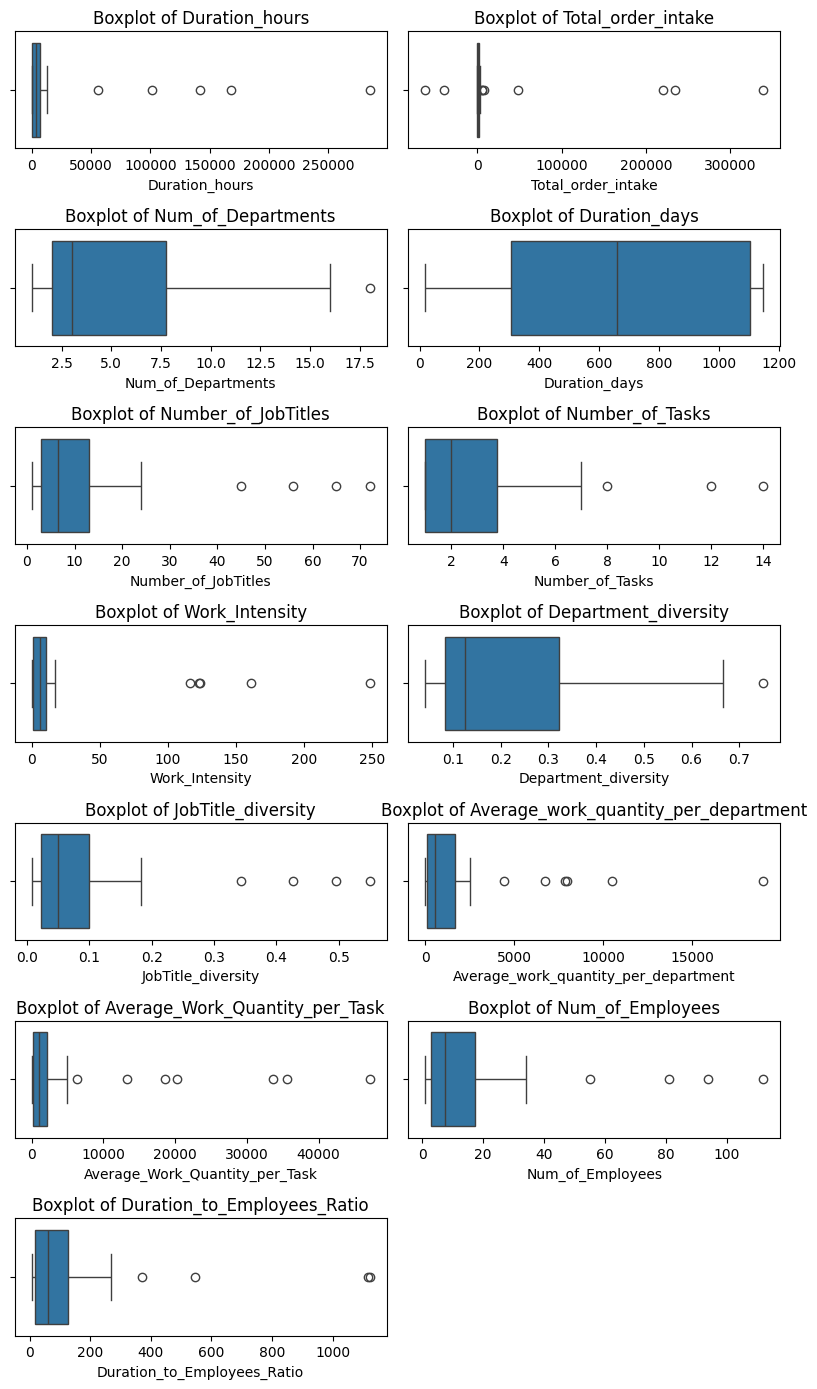

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# select features
features_to_check = ['Duration_hours', 'Total_order_intake', 'Num_of_Departments', 'Duration_days', 'Number_of_JobTitles',
                     'Number_of_Tasks', 'Work_Intensity', 'Department_diversity', 'JobTitle_diversity',
                     'Average_work_quantity_per_department', 'Average_Work_Quantity_per_Task', 'Num_of_Employees', 'Duration_to_Employees_Ratio']

# Calculate number of rows needed for the subplots
num_rows = (len(features_to_check) + 1) // 2  # Adding 2 to round up when the number of features is not a multiple of 3

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 2))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot boxplots
for i, feature in enumerate(features_to_check):
    sns.boxplot(ax=axes[i], x=final_1_df[feature])
    axes[i].set_title(f'Boxplot of {feature}')

# Hide empty subplots
for j in range(len(features_to_check), num_rows * 2):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

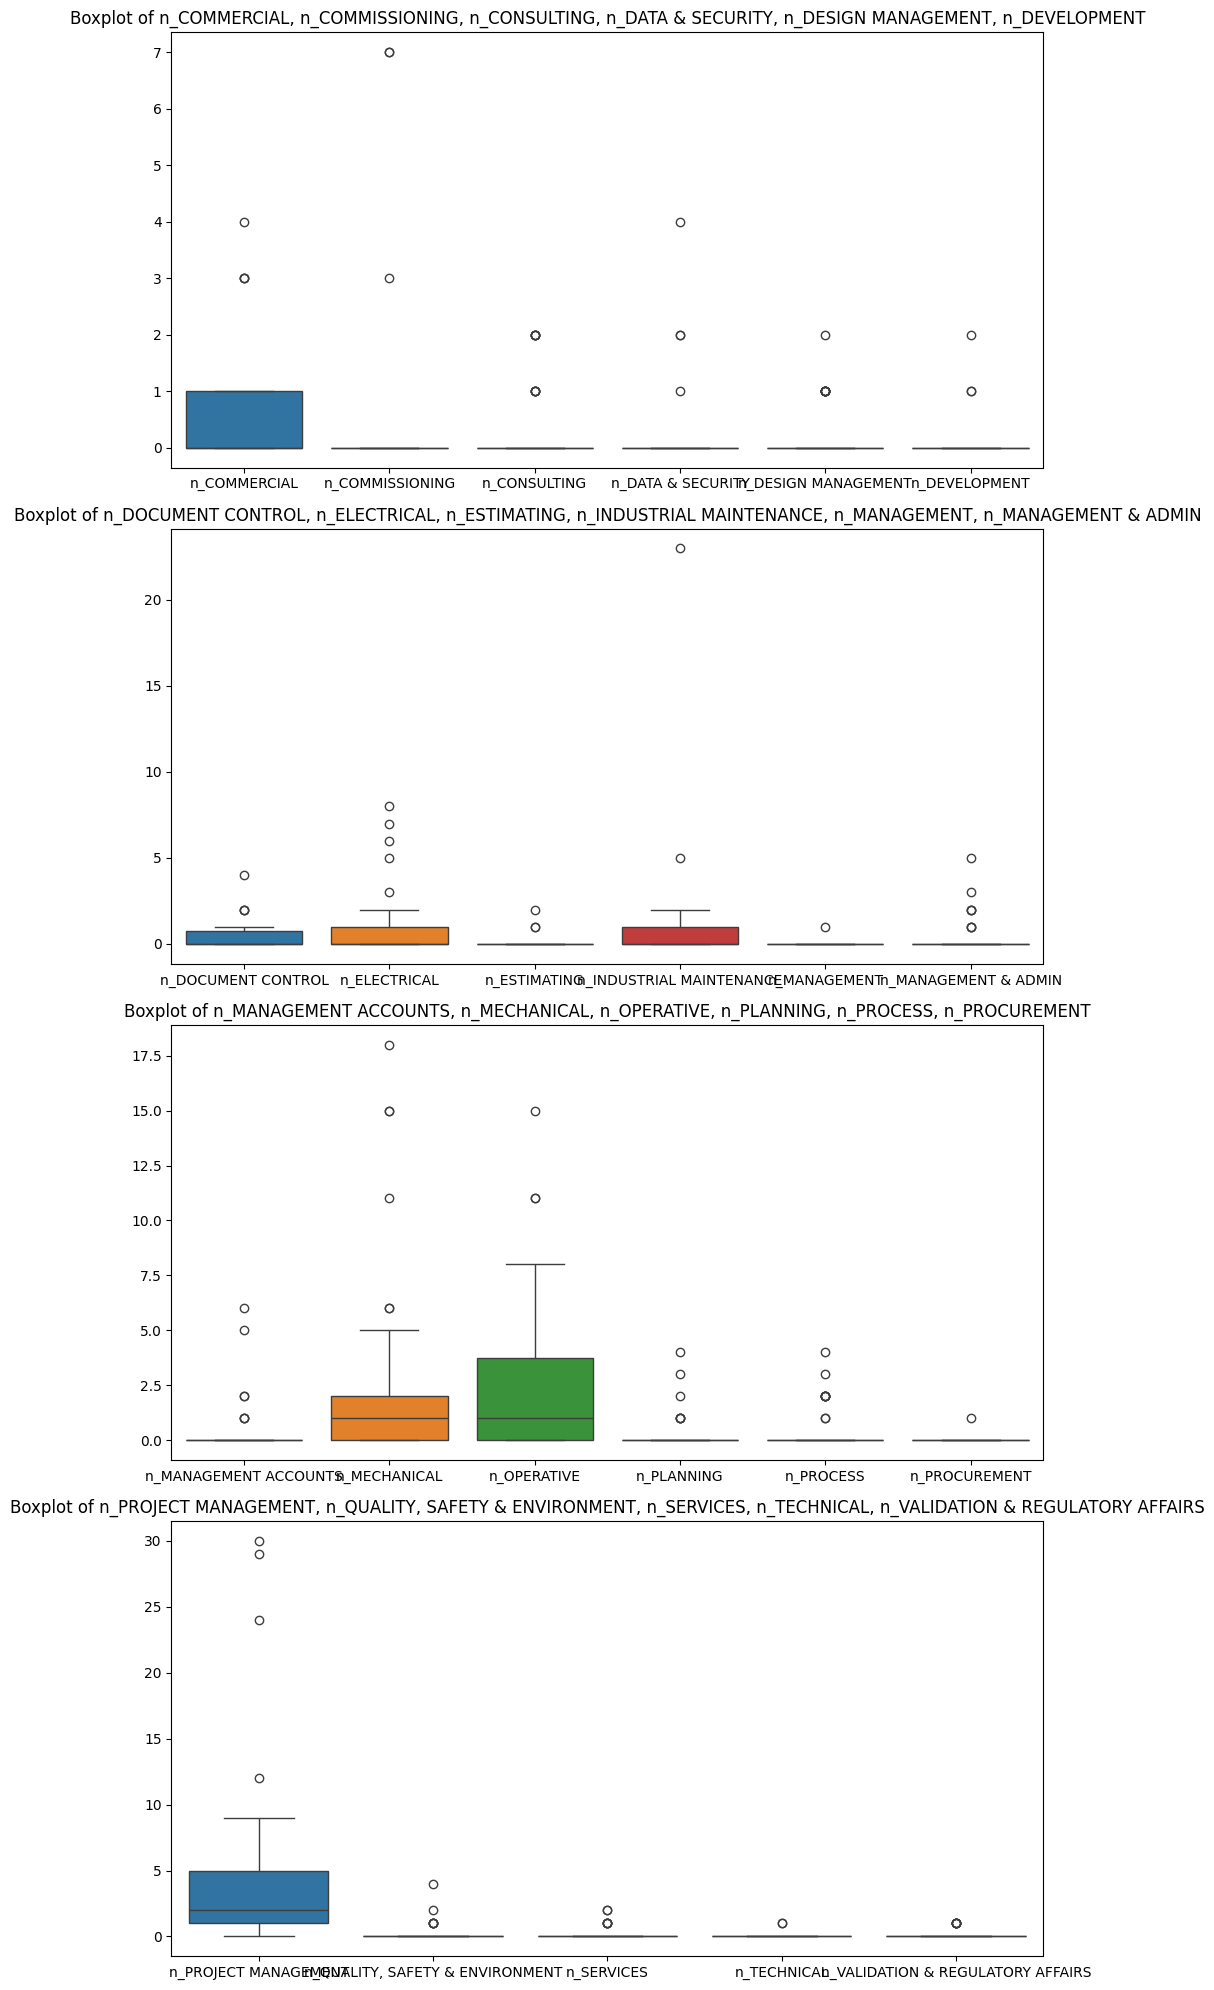

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# check outliers of numbers of each department
groups_to_check = [
    ['n_COMMERCIAL', 'n_COMMISSIONING', 'n_CONSULTING', 'n_DATA & SECURITY', 'n_DESIGN MANAGEMENT', 'n_DEVELOPMENT'],
    ['n_DOCUMENT CONTROL', 'n_ELECTRICAL', 'n_ESTIMATING', 'n_INDUSTRIAL MAINTENANCE', 'n_MANAGEMENT', 'n_MANAGEMENT & ADMIN'],
    ['n_MANAGEMENT ACCOUNTS', 'n_MECHANICAL', 'n_OPERATIVE', 'n_PLANNING', 'n_PROCESS', 'n_PROCUREMENT'],
    ['n_PROJECT MANAGEMENT', 'n_QUALITY, SAFETY & ENVIRONMENT', 'n_SERVICES', 'n_TECHNICAL', 'n_VALIDATION & REGULATORY AFFAIRS']
]


fig, axes = plt.subplots(len(groups_to_check), 1, figsize=(10, len(groups_to_check) * 5))

# # plotting a box-plot using loop
for i, group in enumerate(groups_to_check):
    sns.boxplot(ax=axes[i], data=final_1_df[group])
    axes[i].set_title(f'Boxplot of {", ".join(group)}')  # set title

plt.tight_layout()  # adjust layout
plt.show()


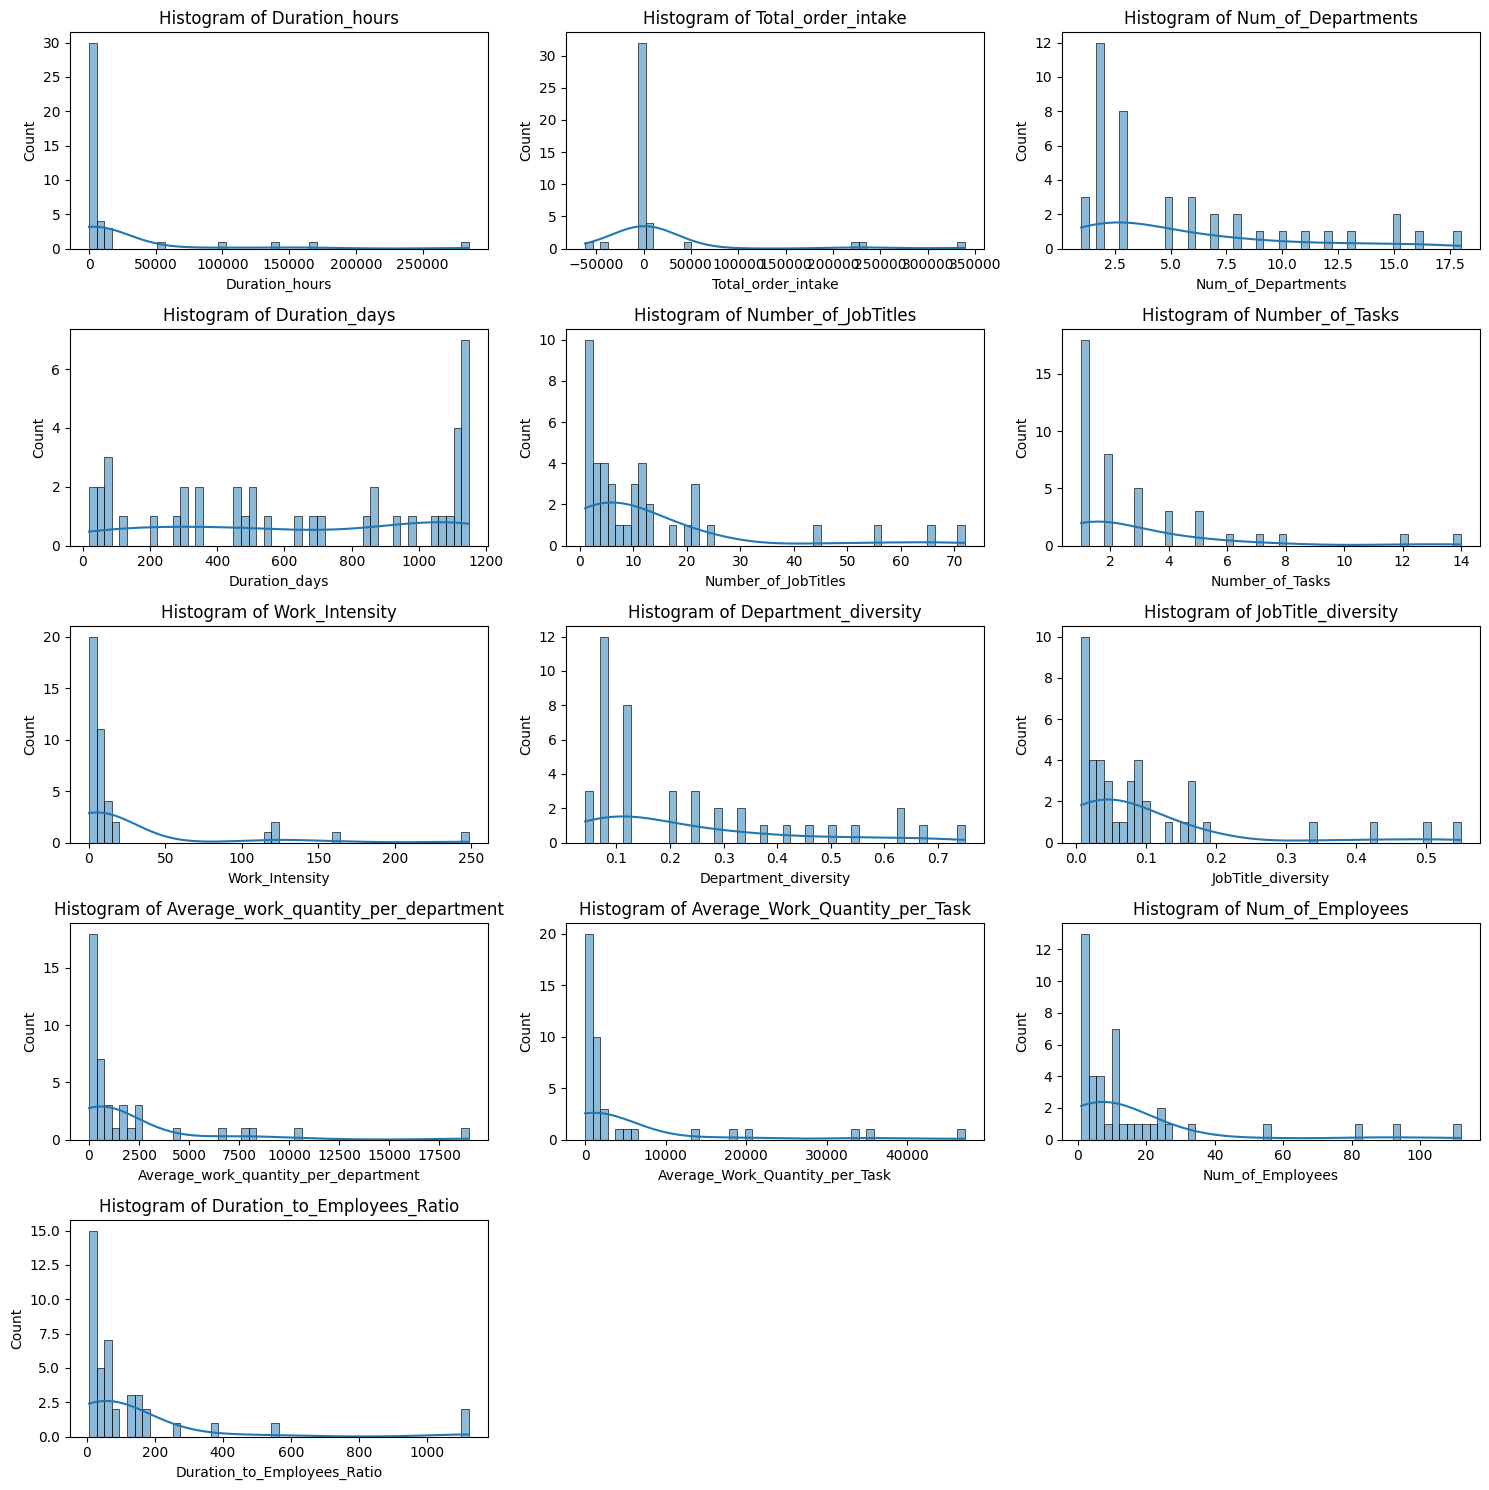

In [36]:
# check distribution of variables---histogram
columns_to_plot =['Duration_hours', 'Total_order_intake', 'Num_of_Departments', 'Duration_days', 'Number_of_JobTitles',
                     'Number_of_Tasks', 'Work_Intensity', 'Department_diversity', 'JobTitle_diversity',
                     'Average_work_quantity_per_department', 'Average_Work_Quantity_per_Task', 'Num_of_Employees', 'Duration_to_Employees_Ratio']

plt.figure(figsize=(15, 15))
for i, column in enumerate(columns_to_plot):
 plt.subplot(5, 3, i + 1)
 sns.histplot(final_1_df[column], bins=50, kde=True)
 plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

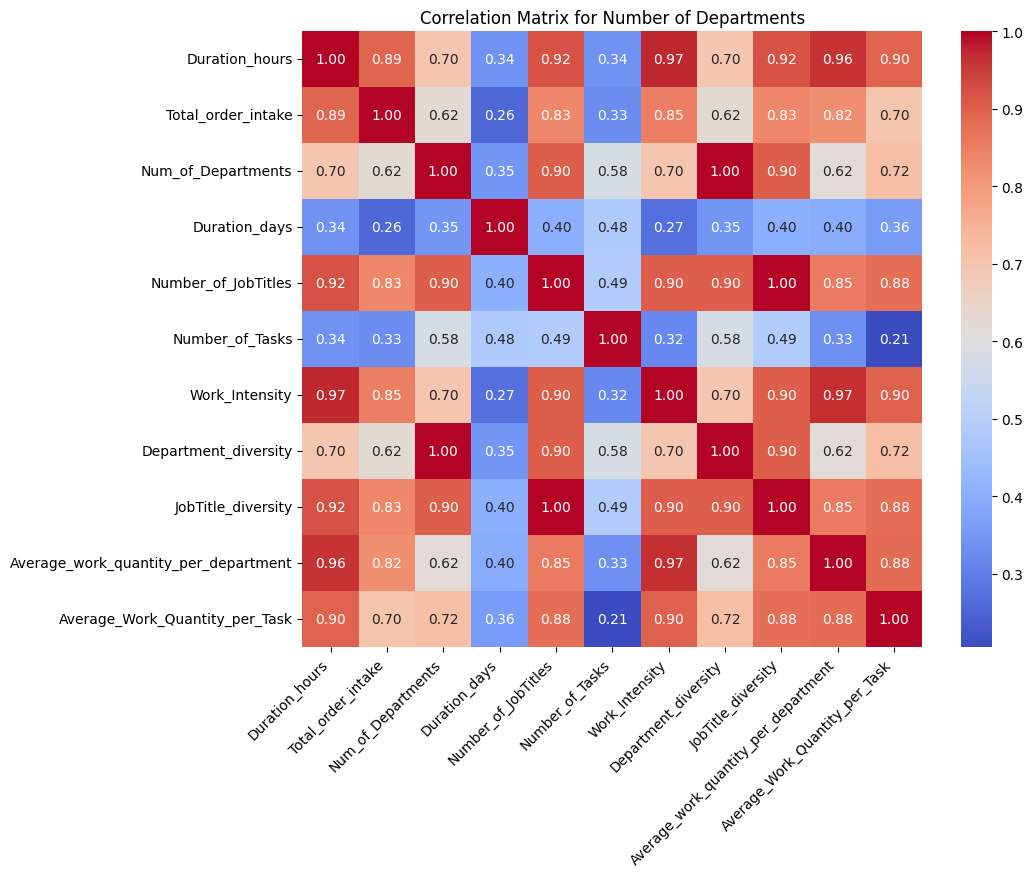

In [37]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# part 1 correlation
focused_columns = ['Duration_hours', 'Total_order_intake', 'Num_of_Departments', 'Duration_days','Number_of_JobTitles',
       'Number_of_Tasks', 'Work_Intensity', 'Department_diversity',
       'JobTitle_diversity', 'Average_work_quantity_per_department',
       'Average_Work_Quantity_per_Task']
focused_corr_matrix = final_1_df[focused_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(focused_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix for Number of Departments')
plt.xticks(rotation=45, ha='right')
plt.show()

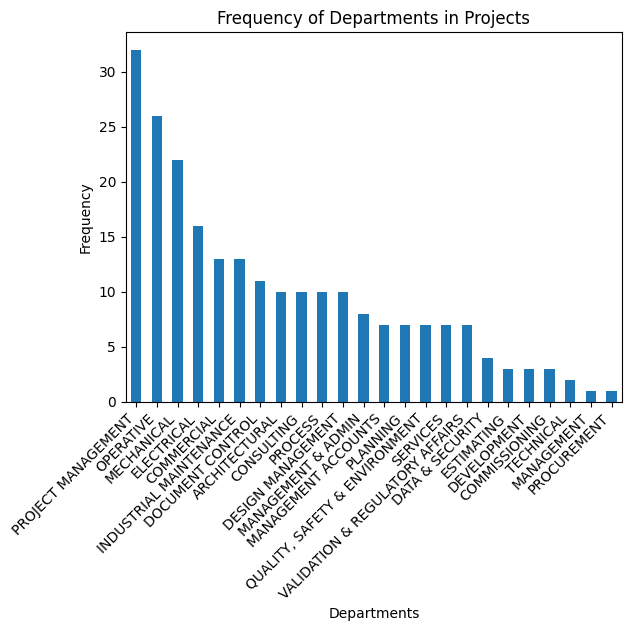

In [38]:
# calculate department diversity
department_columns = ['ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT',
                      'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT',
                      'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS',
                      'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL',
                      'VALIDATION & REGULATORY AFFAIRS']

department_frequencies = final_1_df[department_columns].sum().sort_values(ascending=False)

# histogram of frequency of departments
department_frequencies.plot(kind='bar')
plt.title('Frequency of Departments in Projects')
plt.ylabel('Frequency')
plt.xlabel('Departments')
plt.xticks(rotation=45, ha='right') 
plt.show()


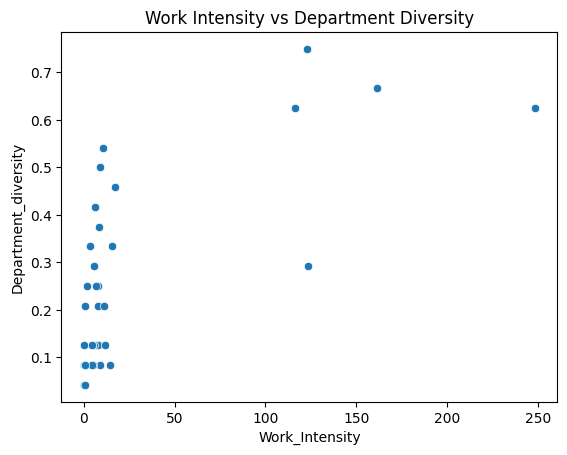

In [39]:
# work intensity and department diversity scatterplot
sns.scatterplot(data=final_1_df, x='Work_Intensity', y='Department_diversity')
plt.title('Work Intensity vs Department Diversity')
plt.show()

In [40]:
## median of duration days 

median_duration_days = final_1_df['Duration_days'].median()
median_duration_days

661.0

In [41]:
## average of duration days

average_duration_days = final_1_df['Duration_days'].mean()
print(average_duration_days)

651.7619047619048


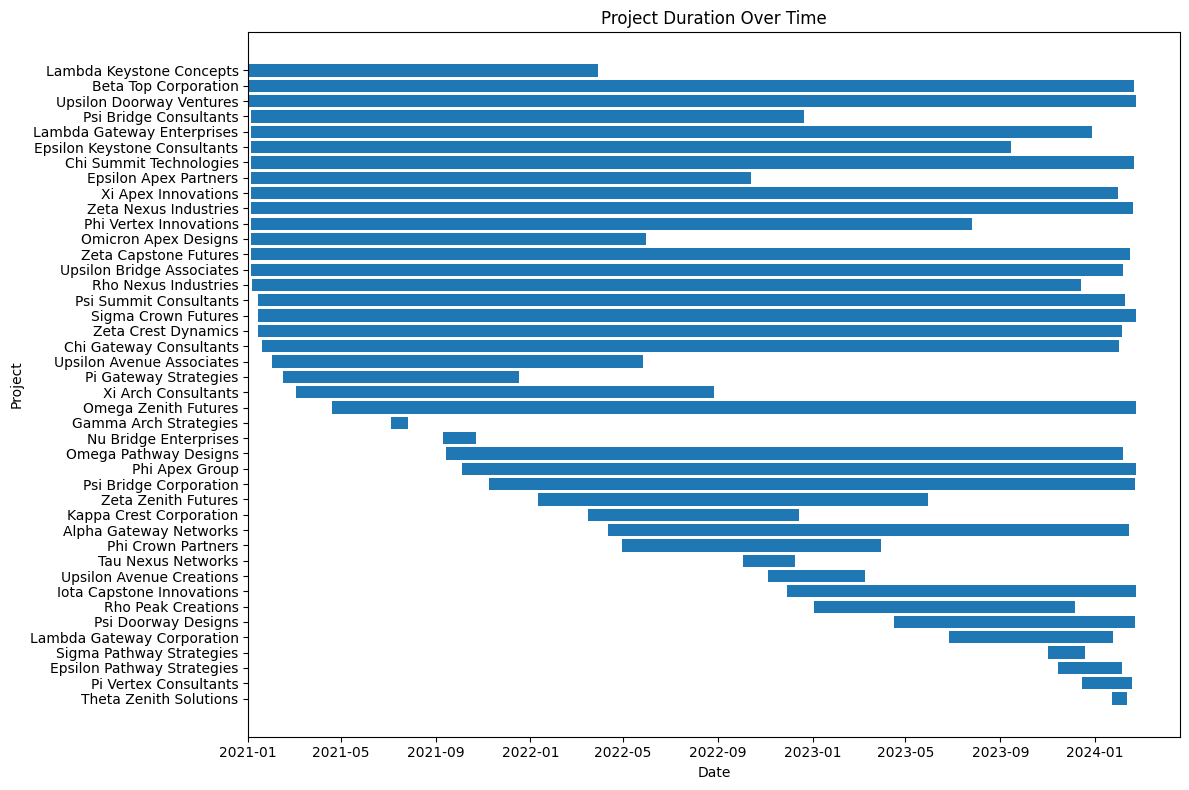

In [42]:
## distribution of duration days
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Convert date columns to datetime type
unique_projects_df2['min'] = pd.to_datetime(unique_projects_df2['min'])
unique_projects_df2['max'] = pd.to_datetime(unique_projects_df2['max'])

# Sort projects by start time
unique_projects_df2_sorted = unique_projects_df2.sort_values('min', ascending=False)


plt.figure(figsize=(12, 8))

# Convert time to matplotlib's internal format
unique_projects_df2_sorted['min_num'] = date2num(unique_projects_df2_sorted['min'])
unique_projects_df2_sorted['max_num'] = date2num(unique_projects_df2_sorted['max'])

# Draw horizontal bars
plt.barh(unique_projects_df2_sorted['Project_name'], 
        unique_projects_df2_sorted['max_num'] - unique_projects_df2_sorted['min_num'], 
        left=unique_projects_df2_sorted['min_num'])

# Set y-axis labels
plt.yticks(unique_projects_df2_sorted['Project_name'])

# Set x-axis as date format
plt.gca().xaxis_date()

# Set chart title and axis labels
plt.title('Project Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Project')

# Adjust legend display
plt.tight_layout()

# Show the plot
plt.show()

## Over-Sampling the dataset to handle the data imbalance Issue  - ( New df = resampled_df)

In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
## The imbalance in the dataset is visible :
final_1_df['Num_of_Departments'].value_counts()

Num_of_Departments
2     12
3      8
6      3
1      3
5      3
15     2
7      2
8      2
12     1
9      1
11     1
16     1
10     1
18     1
13     1
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
import pandas as pd


# Apply label encoding to categorical columns
encoder = LabelEncoder()
final_1_df['Project_name'] = encoder.fit_transform(final_1_df['Project_name'])

# Separate features (X) and target variable (y)
X = final_1_df.drop(columns=['Num_of_Departments'])
y = final_1_df['Num_of_Departments']

# Apply RandomOverSampler to the training data with a custom sampling strategy
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Num_of_Departments'])], axis=1)

# Check the class distribution after oversampling
print("Class distribution after oversampling:")
print(resampled_df['Num_of_Departments'].value_counts())


Class distribution after oversampling:
Num_of_Departments
12    12
15    12
2     12
9     12
6     12
3     12
11    12
7     12
1     12
16    12
8     12
10    12
5     12
18    12
13    12
Name: count, dtype: int64


In [46]:
resampled_df.shape

(180, 63)

In [47]:
# Inverse transform the encoded project names to get the actual string names
resampled_df['Project_name'] = encoder.inverse_transform(resampled_df['Project_name'])

In [48]:
# Check the first few rows of the DataFrame
print("DataFrame with original categorical columns:")

print(resampled_df.head())

DataFrame with original categorical columns:
   Project_ID             Project_name  Duration_hours  Total_order_intake  Duration_days  Number_of_JobTitles  Number_of_Tasks  Num_of_Employees  Duration_to_Employees_Ratio  Work_Intensity  Department_diversity  JobTitle_diversity  Average_work_quantity_per_department  Average_Work_Quantity_per_Task  ARCHITECTURAL  COMMERCIAL  COMMISSIONING  CONSULTING  DATA & SECURITY  DESIGN MANAGEMENT  DEVELOPMENT  DOCUMENT CONTROL  ELECTRICAL  ESTIMATING  INDUSTRIAL MAINTENANCE  MANAGEMENT  MANAGEMENT & ADMIN  MANAGEMENT ACCOUNTS  MECHANICAL  OPERATIVE  PLANNING  PROCESS  PROCUREMENT  PROJECT MANAGEMENT  QUALITY, SAFETY & ENVIRONMENT  SERVICES  TECHNICAL  VALIDATION & REGULATORY AFFAIRS  n_ARCHITECTURAL  n_COMMERCIAL  n_COMMISSIONING  n_CONSULTING  n_DATA & SECURITY  n_DESIGN MANAGEMENT  n_DEVELOPMENT  n_DOCUMENT CONTROL  n_ELECTRICAL  n_ESTIMATING  n_INDUSTRIAL MAINTENANCE  n_MANAGEMENT  n_MANAGEMENT & ADMIN  n_MANAGEMENT ACCOUNTS  n_MECHANICAL  n_OPE

# Modelling

### Output 1 : Predicting No. of departments

#### 1. Normal method(Original Data): If data is imbalanced then we have to calculate precision vs recall curve ( not the ROC curve)

In [49]:
from sklearn.model_selection import train_test_split

#Step 1: Split the data into training and testing sets
X = final_1_df[['Duration_hours', 'Duration_days', 'Total_order_intake','Work_Intensity']]
y_columns = ['Num_of_Departments']
y = final_1_df[y_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross-Validation MSE Scores: [ 9.53975714 22.19561429  5.95718571  4.77038333  8.79536667]
Mean Cross-Validation MSE: 10.251661428571428

Training Mean Absolute Error: 0.8421212121212119
Training Mean Squared Error: 1.3336757575757576
Training Root Mean Squared Error: 1.1548488029070116
Training R-squared (R2) Score: 0.9413372283706277

Testing Mean Absolute Error: 1.7777777777777777
Testing Mean Squared Error: 6.222222222222222
Testing Root Mean Squared Error: 2.494438257849294
Testing R-squared (R2) Score: 0.534195933456562
Testing Adjusted R-squared (Adjusted R2) Score: 0.06839186691312404


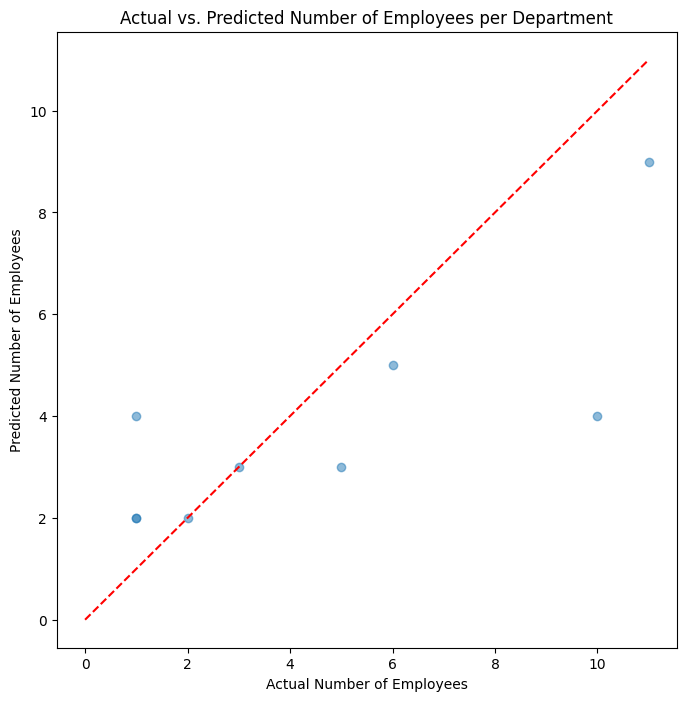

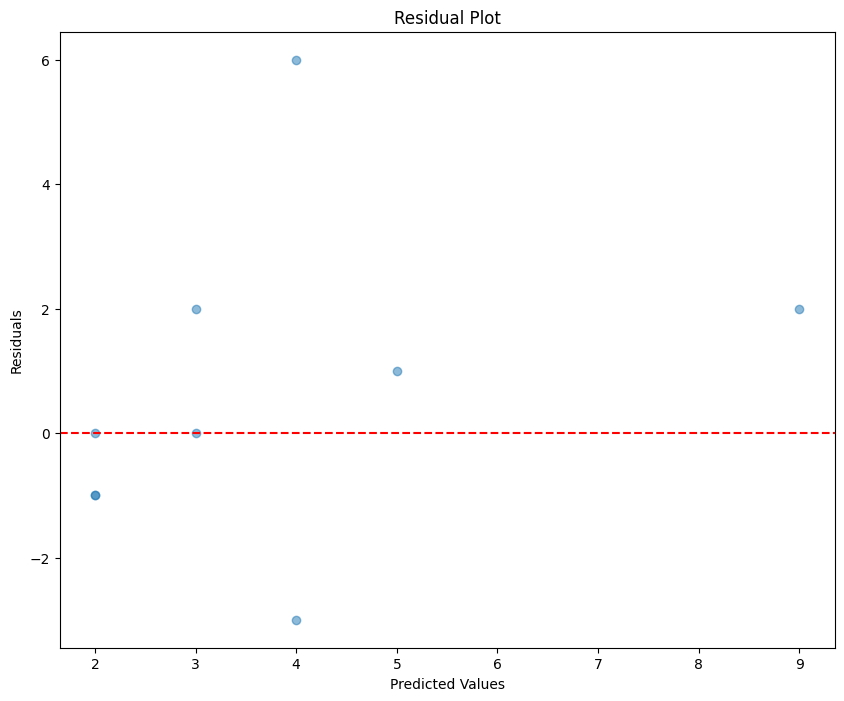

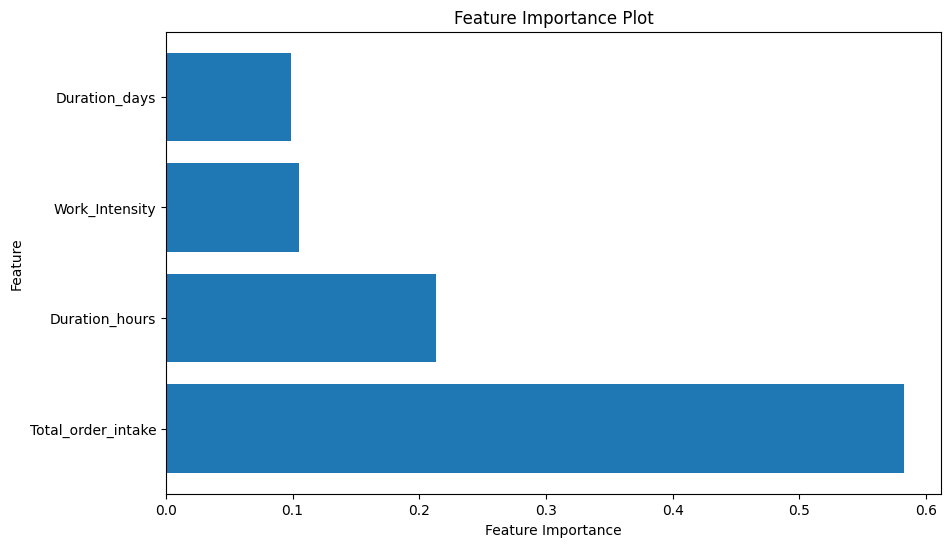

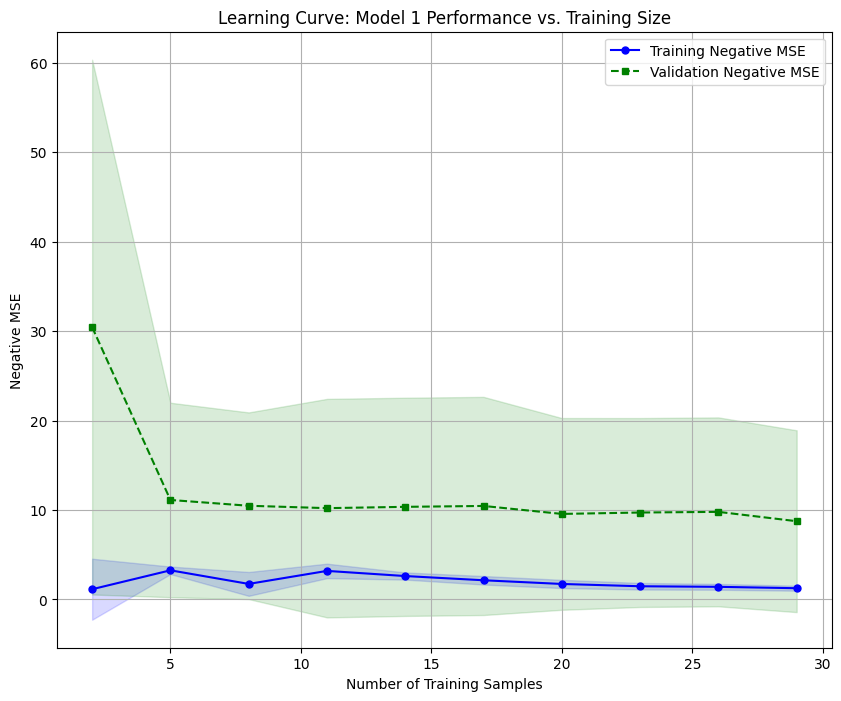

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the pipeline with standard scaler and Random Forest Regressor model
model1_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model1_pipe_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())

# Fit the pipeline on the entire training data
model1_pipe_cv.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model1_pipe_cv.predict(X_train)

# Evaluate the model on training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)
print("\nTraining Mean Absolute Error:", train_mae)
print("Training Mean Squared Error:", train_mse)
print("Training Root Mean Squared Error:", train_rmse)
print("Training R-squared (R2) Score:", train_r2)

#################################################################################################################################################

# Make predictions on test data
test_predictions = model1_pipe_cv.predict(X_test)
#Round off the predictions
test_predictions = np.round(test_predictions).astype(int)

# Evaluate the model on testing data
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)
print("\nTesting Mean Absolute Error:", test_mae)
print("Testing Mean Squared Error:", test_mse)
print("Testing Root Mean Squared Error:", test_rmse)
print("Testing R-squared (R2) Score:", test_r2)

# Calculate the number of predictors (features)
num_predictors = X.shape[1]

# Calculate the total number of samples
num_samples = len(y_test)

# Calculate the Adjusted R-squared (Adjusted R2) score for testing data
test_adjusted_r2 = 1 - (1 - test_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))
print("Testing Adjusted R-squared (Adjusted R2) Score:", test_adjusted_r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values.flatten(), test_predictions.flatten(), alpha=0.5)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Number of Employees per Department")
plt.xlabel("Actual Number of Employees")
plt.ylabel("Predicted Number of Employees")
plt.show()

# Calculate residuals
residuals = y_test.values.flatten() - test_predictions.flatten()

# Create residual plot
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions.flatten(), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Feature Importance
feature_importance = model1_pipe_cv.named_steps['regressor'].feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model1_pipe_cv, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)  # Negate scores to convert them back to positive
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate scores to convert them back to positive
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Negative MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Negative MSE')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative MSE')
plt.title('Learning Curve: Model 1 Performance vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Concatenate y_test and y_pred along columns (axis=1)
results = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(test_predictions, columns=y_test.columns)], axis=1)

# Print the results
print("Test Data and Predicted Values:")
print(results)

Test Data and Predicted Values:
   Num_of_Departments  Num_of_Departments
0                   1                   2
1                   1                   2
2                  11                   9
3                   3                   3
4                   6                   5
5                   1                   4
6                  10                   4
7                   2                   2
8                   5                   3


#### 2. Model 1 on Cross validation on Model 1(oversampled data)

In [125]:
resampled_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS,Num_of_Departments
0,1,Alpha Gateway Networks,6040.5,2116.7104,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,4,1,0,1,0,2,0,1,2,0,1,0,0,1,5,3,0,0,0,3,1,0,0,0,12
1,2,Beta Top Corporation,284691.0,339309.3941,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0,15
2,3,Chi Gateway Consultants,126.0,15.8268,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2
3,4,Chi Summit Technologies,9532.0,2785.9621,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,2,0,0,2,0,1,0,0,3,0,1,0,1,0,4,1,0,0,0,3,0,0,0,0,9
4,5,Epsilon Apex Partners,4907.0,602.0486,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,3,0,0,0,0,0,0,6


In [126]:
from sklearn.model_selection import train_test_split

#Step 1: Split the data into training and testing sets
X = resampled_df[['Duration_hours', 'Duration_days', 'Total_order_intake','Work_Intensity']]
y = resampled_df[['Num_of_Departments']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [127]:
print(X.head())
print(y.head())

   Duration_hours  Duration_days  Total_order_intake  Work_Intensity
0          6040.5            674           2116.7104        8.962166
1        284691.0           1146         339309.3941      248.421466
2           126.0           1108             15.8268        0.113718
3          9532.0           1143           2785.9621        8.339458
4          4907.0            648            602.0486        7.572531
   Num_of_Departments
0                  12
1                  15
2                   2
3                   9
4                   6


In [128]:
y.value_counts()

Num_of_Departments
1                     12
2                     12
3                     12
5                     12
6                     12
7                     12
8                     12
9                     12
10                    12
11                    12
12                    12
13                    12
15                    12
16                    12
18                    12
Name: count, dtype: int64

##### Model without tuning

Cross-Validation MSE Scores: [1.6961     0.03047931 3.56587586 0.08536897 2.006375  ]
Mean Cross-Validation MSE: 1.4768398275862065

Training Mean Absolute Error: 0.10993055555555555
Training Mean Squared Error: 0.16451458333333335
Training Root Mean Squared Error: 0.40560397351768307
Training R-squared (R2) Score: 0.9934945108927808

Testing Mean Absolute Error: 0.16666666666666666
Testing Mean Squared Error: 0.3333333333333333
Testing Root Mean Squared Error: 0.5773502691896257
Testing R-squared (R2) Score: 0.9860067374967608
Testing Adjusted R-squared (Adjusted R2) Score: 0.9842011552382783


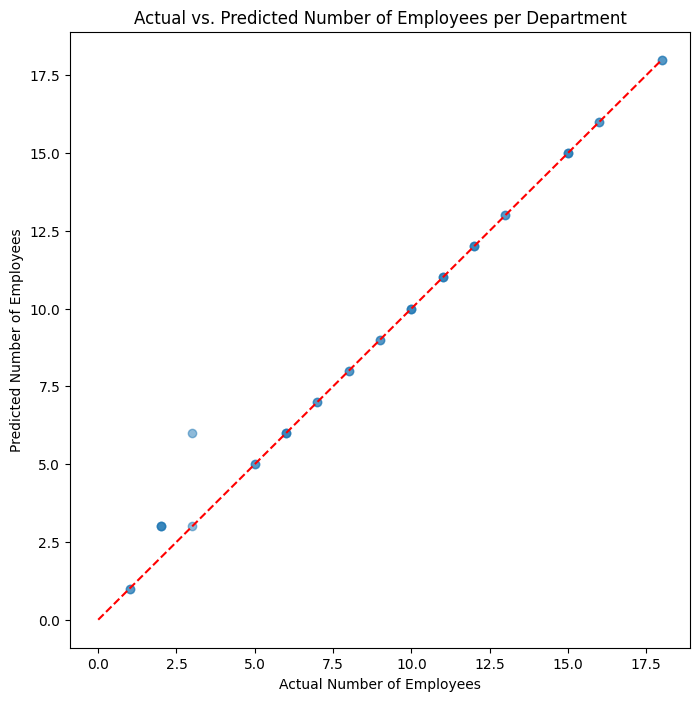

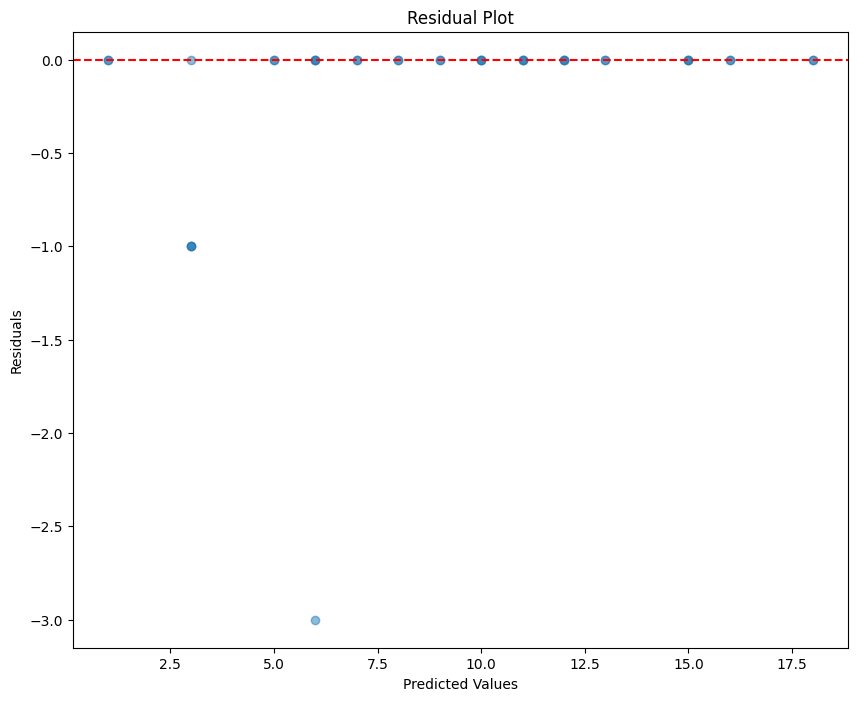

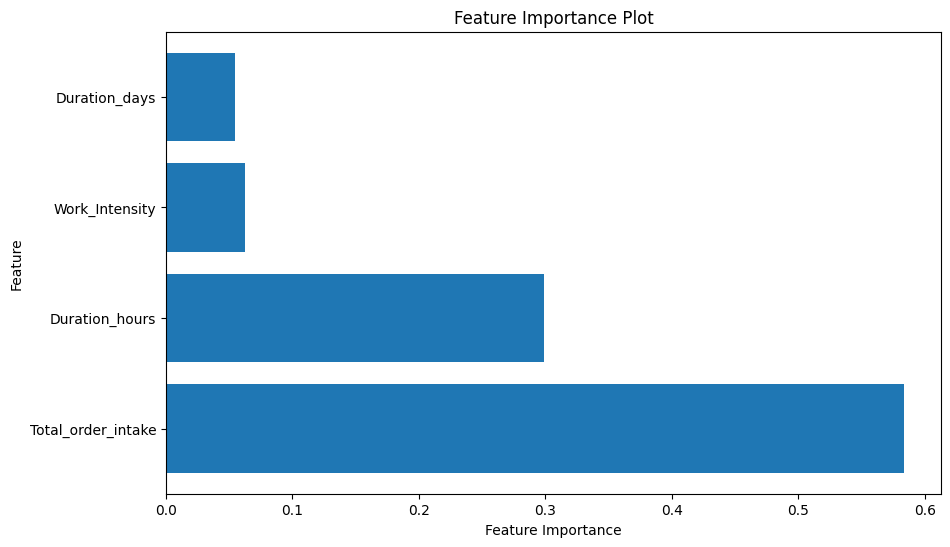

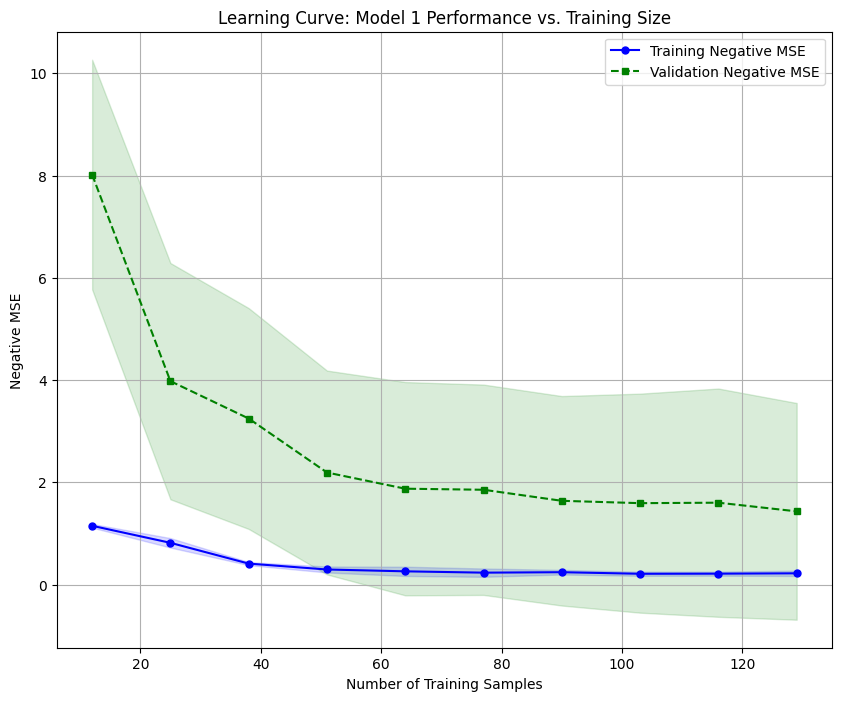

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the pipeline with standard scaler and Random Forest Regressor model
model1_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model1_pipe_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())

# Fit the pipeline on the entire training data
model1_pipe_cv.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model1_pipe_cv.predict(X_train)

# Evaluate the model on training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)
print("\nTraining Mean Absolute Error:", train_mae)
print("Training Mean Squared Error:", train_mse)
print("Training Root Mean Squared Error:", train_rmse)
print("Training R-squared (R2) Score:", train_r2)

#################################################################################################################################################

# Make predictions on test data
test_predictions = model1_pipe_cv.predict(X_test)
#Round off the predictions
test_predictions = np.round(test_predictions).astype(int)

# Evaluate the model on testing data
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)
print("\nTesting Mean Absolute Error:", test_mae)
print("Testing Mean Squared Error:", test_mse)
print("Testing Root Mean Squared Error:", test_rmse)
print("Testing R-squared (R2) Score:", test_r2)

# Calculate the number of predictors (features)
num_predictors = X.shape[1]

# Calculate the total number of samples
num_samples = len(y_test)

# Calculate the Adjusted R-squared (Adjusted R2) score for testing data
test_adjusted_r2 = 1 - (1 - test_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))
print("Testing Adjusted R-squared (Adjusted R2) Score:", test_adjusted_r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values.flatten(), test_predictions.flatten(), alpha=0.5)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Number of Employees per Department")
plt.xlabel("Actual Number of Employees")
plt.ylabel("Predicted Number of Employees")
plt.show()

# Calculate residuals
residuals = y_test.values.flatten() - test_predictions.flatten()

# Create residual plot
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions.flatten(), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Feature Importance
feature_importance = model1_pipe_cv.named_steps['regressor'].feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model1_pipe_cv, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)  # Negate scores to convert them back to positive
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate scores to convert them back to positive
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Negative MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Negative MSE')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative MSE')
plt.title('Learning Curve: Model 1 Performance vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

##### Model with Hyperparamter tuning ( It handles overfitting)

Defining the objective function for hyperparameter optimization

Saving the state of our tuning to use it later

In [132]:
import optuna
import joblib
import os

# Define the objective function for hyperparameter optimization
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 9, 11)
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)

    # Create a RandomForestClassifier with the suggested hyperparameters
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Evaluate the classifier using cross-validation
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Check if study.pkl exists before creating/loading study object
study_file = "study.pkl"
if os.path.exists(study_file):
    study = joblib.load(study_file)
else:
    # Perform hyperparameter optimization using Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=200)  ###################    TRIALS    #################
    joblib.dump(study, study_file)

# Print the best hyperparameters and their corresponding accuracy
print("Best trial:")
best_trial = study.best_trial
print("Value: ", best_trial.value)
print("Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


Best trial:
Value:  0.9369458128078818
Params: 
    n_estimators: 117
    max_depth: 9
    min_samples_split: 7
    min_samples_leaf: 1


Best Hyperparameters: {'n_estimators': 117, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 1}

*Evaluation of Model 1 on over-sampled data*

Cross-Validation Scores: [0.8        0.86666667 0.86666667 0.86666667 0.92857143 0.85714286
 0.85714286 0.92857143 0.85714286 0.85714286]
Average Cross-Validation Score: 0.8685714285714285

Training Accuracy: 0.9861111111111112
Testing Accuracy: 0.9166666666666666
F1 Score: 0.9166666666666666

Confusion Matrix:
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


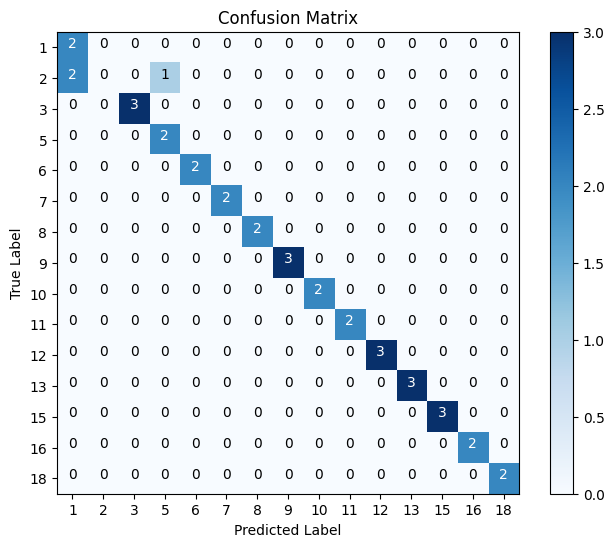


Classification Report:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         3
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2

    accuracy                           0.92        36
   macro avg       0.88      0.93      0.90        36
w

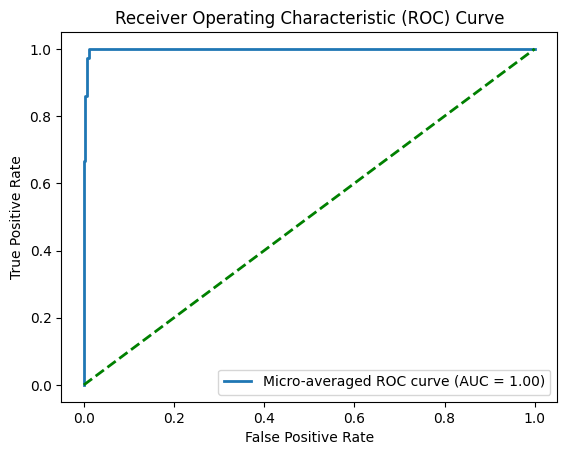

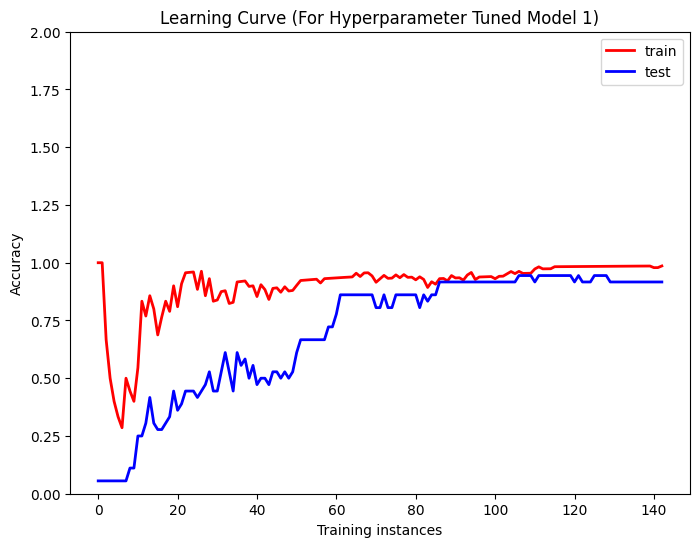

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the saved study object containing the best hyperparameters
study_file = "study.pkl"
if os.path.exists(study_file):
    study = joblib.load(study_file)
else:
    raise FileNotFoundError(f"{study_file} not found. Please run the hyperparameter optimization process first.")

#########################################################################################################################################################

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Define the pipeline with the best hyperparameters
model1_pipe_cv_1 = Pipeline([
    ('scaler_1', StandardScaler()),
    ('classifier', RandomForestClassifier(**best_params, random_state=42))
])

# Fit the pipeline on the training data
model1_pipe_cv_1.fit(X_train, y_train)

print("\n*Evaluation of Model 1 on over-sampled data*")

# Apply Cross-Validation on the training data
cv_scores = cross_val_score(model1_pipe_cv_1, X_train, y_train, cv=10)
print("\nCross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Predict on the untouched test data
y_pred_test = model1_pipe_cv_1.predict(X_test)

# Evaluate using training accuracy, testing accuracy, and classification report
training_accuracy = accuracy_score(y_train, model1_pipe_cv_1.predict(X_train))
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# F1 Score
cv_f1 = f1_score(y_test, y_pred_test, average='micro')
print("F1 Score:", cv_f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)
# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
unique_classes = np.unique(y)
tick_marks = np.arange(len(unique_classes))
plt.xticks(tick_marks, unique_classes)
plt.yticks(tick_marks, unique_classes)
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_test)
print("\nClassification Report:\n", report)

#Calculate the y_score
y_score = model1_pipe_cv_1.predict_proba(X_test)

#Binarize the output
unique_classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=unique_classes)
n_classes = y_test_bin.shape[1]

# Calculate micro-averaged ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-averaged ROC curve
plt.plot(fpr_micro, tpr_micro, lw=2, label='Micro-averaged ROC curve (AUC = {:.2f})'.format(roc_auc_micro))

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc="lower right")

# Show plot
plt.show()

# Plot learning curves
def plot_learning_curves(model, X, y, ylimb, ylimt):
    train_errors = []
    test_errors = []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_pred))
        test_errors.append(accuracy_score(y_test, y_test_pred))
    plt.figure(figsize=(8, 6))
    plt.plot(train_errors, "r-", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=2, label="test")
    plt.ylim(ylimb, ylimt)
    plt.title("Learning Curve (For Hyperparameter Tuned Model 1)")
    plt.xlabel("Training instances")
    plt.ylabel("Accuracy")
    plt.legend()

plot_learning_curves(model1_pipe_cv_1, X, y, 0, 2.0)
plt.show()



In [60]:
# Concatenate y_test and y_pred along columns (axis=1) with specified column names
results = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred_test, columns=['Predicted_' + col for col in y_test.columns])], axis=1)

# Rename the original department count columns
results.columns = ['Original_' + col for col in y_test.columns] + ['Predicted_' + col for col in y_test.columns]

# Print the results
print("Test Data and Predicted Values:")
results

Test Data and Predicted Values:


,Original_Num_of_Departments,Predicted_Num_of_Departments
0,16,16
1,5,5
2,7,7
3,16,16
4,11,11
5,12,12
6,8,8
7,10,10
8,9,9
9,9,9


### Testing Model 1 

In [165]:
import numpy as np

def predict_number_of_departments(model):
    """
    Predict number of departments based on user input using the provided model.

    Args:
    model (sklearn.pipeline.Pipeline): Trained pipeline model.

    Returns:
    int: Predicted number of departments for the user-provided input.
    """
    # Get user input for features
    duration_hours = float(input("Enter Duration (in hours): "))
    total_order_intake = float(input("Enter Total Order Intake: "))
    duration_days = float(input("Enter Duration (in days): "))

    # Calculate work intensity
    work_intensity = total_order_intake / duration_hours

    # Create input data array
    input_data = np.array([[duration_hours, total_order_intake, duration_days, work_intensity]])

    # Make predictions using the model
    predicted_number_of_departments = model.predict(input_data)

    return predicted_number_of_departments

# # Call the function with the trained model
# predicted_number_of_departments = predict_number_of_departments(model1_pipe_cv_1)
# print("Predicted Number of Departments:", predicted_number_of_departments)


Predicted Number of Departments: [2]


### Output 2 - Name of the predicted departments

In [137]:
# Dataframe for output 2
resampled_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS,Num_of_Departments
0,1,Alpha Gateway Networks,6040.5,2116.7104,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,4,1,0,1,0,2,0,1,2,0,1,0,0,1,5,3,0,0,0,3,1,0,0,0,12
1,2,Beta Top Corporation,284691.0,339309.3941,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0,15
2,3,Chi Gateway Consultants,126.0,15.8268,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2
3,4,Chi Summit Technologies,9532.0,2785.9621,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,2,0,0,2,0,1,0,0,3,0,1,0,1,0,4,1,0,0,0,3,0,0,0,0,9
4,5,Epsilon Apex Partners,4907.0,602.0486,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,3,0,0,0,0,0,0,6


In [153]:
#Step 1: Split the data into training and testing sets
# X = resampled_df[['Duration_hours', 'Total_order_intake', 'Duration_days', 'Number_of_JobTitles', 'Number_of_Tasks', 'Num_of_Employees', 'Duration_to_Employees_Ratio','Work_Intensity', 'Department_diversity', 'JobTitle_diversity', 'Average_work_quantity_per_department', 'Average_Work_Quantity_per_Task','Num_of_Departments']]
X = resampled_df[['Duration_hours', 'Total_order_intake', 'Duration_days','Work_Intensity', 'Department_diversity', 'Average_work_quantity_per_department','Num_of_Departments']]
y = resampled_df[['ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT', 'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT', 'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS', 'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL', 'VALIDATION & REGULATORY AFFAIRS']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
print(X.head())
print(y.head())

   Duration_hours  Total_order_intake  Duration_days  Work_Intensity  Department_diversity  Average_work_quantity_per_department  Num_of_Departments
0          6040.5           2116.7104            674        8.962166              0.500000                            503.375000                  12
1        284691.0         339309.3941           1146      248.421466              0.625000                          18979.400000                  15
2           126.0             15.8268           1108        0.113718              0.083333                             63.000000                   2
3          9532.0           2785.9621           1143        8.339458              0.375000                           1059.111111                   9
4          4907.0            602.0486            648        7.572531              0.250000                            817.833333                   6
   ARCHITECTURAL  COMMERCIAL  COMMISSIONING  CONSULTING  DATA & SECURITY  DESIGN MANAGEMENT  DEVELOPMENT  

In [65]:
X.head()

,Duration_hours,Total_order_intake,Duration_days,Work_Intensity,Department_diversity,Average_work_quantity_per_department,Num_of_Departments
0,6040.5,2116.7104,674,8.962166,0.500000,503.375000,12
1,284691.0,339309.3941,1146,248.421466,0.625000,18979.400000,15
2,126.0,15.8268,1108,0.113718,0.083333,63.000000,2
3,9532.0,2785.9621,1143,8.339458,0.375000,1059.111111,9
4,4907.0,602.0486,648,7.572531,0.250000,817.833333,6


In [66]:
y.head()

,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS
0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0
1,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0


#### Model 2 : With Cross Validation on Oversampled Data

Cross-Validation Scores: [0.8        0.86666667 0.66666667 0.93333333 1.         0.92857143
 0.85714286 1.         0.92857143 0.92857143]
Average Cross-Validation Score: 0.8909523809523809

Training Accuracy Score (Cross-Validation): 1.0
Training F1 Score (Cross-Validation): 1.0

Testing Accuracy Score (Cross-Validation): 0.92
Testing F1 Score (Cross-Validation): 0.99
Testing Confusion Matrix (Cross-Validation):
 [[18  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
Testing Classification Report (Cross-Validation):
                                  precision    recall  f1-score   support

                  ARCHITECTURAL       1.00      1.00      1.00        18
                     COMMERCIAL       1.00      1.00  

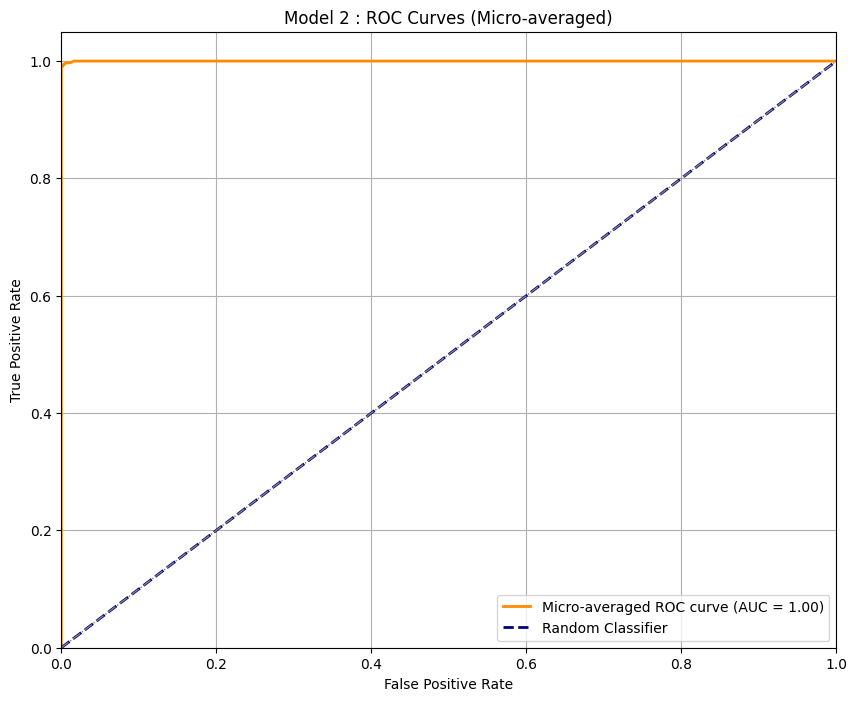

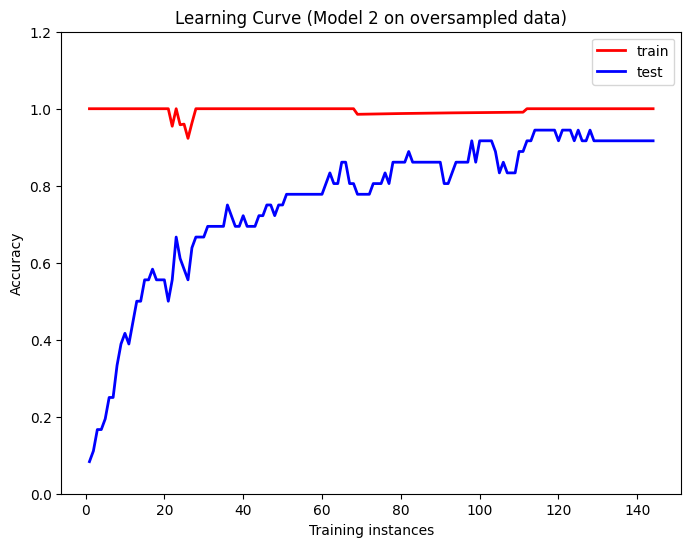

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Define the pipeline with cross-validation
model2_pipe_cv = Pipeline([
    ('scaler_test_2', StandardScaler()),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42), n_jobs=-1))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model2_pipe_cv, X_train, y_train, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Fit the pipeline on the entire training data
model2_pipe_cv.fit(X_train, y_train)

################################################################ TRAINING DATA #################################################################

# Make predictions on training data
train_predictions_cv = model2_pipe_cv.predict(X_train)

# Implement logic to select the top N departments based on all input features for training data
train_department_predictions_cv = train_predictions_cv.copy()
for i, probabilities in enumerate(train_predictions_cv):
    num_departments = int(X_train.iloc[i]['Num_of_Departments'])
    top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
    train_department_predictions_cv[i, :] = 0  # Reset all predictions
    train_department_predictions_cv[i, top_n_departments_idx] = 1  # Set top N predictions to 1

# Evaluate the model on training data
train_accuracy_cv = accuracy_score(y_train, train_department_predictions_cv)
train_f1_cv = f1_score(y_train, train_department_predictions_cv, average='micro')
train_report_cv = classification_report(y_train, train_department_predictions_cv, target_names=y.columns)

print("\nTraining Accuracy Score (Cross-Validation):", train_accuracy_cv)
print("Training F1 Score (Cross-Validation):", train_f1_cv)

################################################################ TESTING DATA #################################################################

# Make predictions on test data
test_predictions_cv = model2_pipe_cv.predict(X_test)

# Implement logic to select the top N departments based on all input features for testing data
for i, probabilities in enumerate(test_predictions_cv):
    # Check if index i is within the bounds of X_test
    if i < len(X_test):
        # Sort departments by probability and set the top N to 1, rest to 0
        num_departments = int(X_test.iloc[i]['Num_of_Departments'])
        top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
        test_predictions_cv[i, :] = 0  # Reset all predictions
        test_predictions_cv[i, top_n_departments_idx] = 1  # Set top N predictions to 1
        
################################################################################################################################################################################

# Evaluate the model on testing data
test_accuracy_cv = accuracy_score(y_test, test_predictions_cv)
test_f1_cv = f1_score(y_test, test_predictions_cv, average='micro')
test_conf_matrix_cv = confusion_matrix(y_test.values.argmax(axis=1), test_predictions_cv.argmax(axis=1))
test_report_cv = classification_report(y_test, test_predictions_cv, target_names=y.columns)

print("\nTesting Accuracy Score (Cross-Validation):", np.round(test_accuracy_cv, 2))
print("Testing F1 Score (Cross-Validation):", np.round(test_f1_cv, 2))
print("Testing Confusion Matrix (Cross-Validation):\n", test_conf_matrix_cv)
print("Testing Classification Report (Cross-Validation):\n", test_report_cv)

################################################################ PLOT ROC CURVES #################################################################

# Make predictions on test data probabilities
test_predictions_cv_proba = model2_pipe_cv.predict_proba(X_test)

# Extract probabilities for positive class from the predicted probabilities
y_score = np.array([class_prob[:, 1] for class_prob in test_predictions_cv_proba])

# Transpose y_score to match the shape of y_test
y_score = np.transpose(y_score)

# Calculate micro-averaged ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test.values.ravel(), np.array(y_score).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-averaged ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-averaged ROC curve (AUC = {:.2f})'.format(roc_auc_micro))

# Print ROC AUC for each department and plot ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0
num_departments_with_data = 0
for i in range(len(y.columns)):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], np.array(y_score)[:, i])
    if len(fpr) > 0 and len(tpr) > 0:
        roc_auc = auc(fpr, tpr)
        print('ROC AUC for {} department: {:.2f}'.format(y.columns[i], roc_auc))
        mean_tpr += np.interp(all_fpr, fpr, tpr)
        num_departments_with_data += 1

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Highlight the best fit line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='-.')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 2 : ROC Curves (Micro-averaged)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot learning curves
def plot_learning_curves(model, X_train, y_train, X_test, y_test, ylimb, ylimt):
    train_errors = []
    test_errors = []
    train_sizes = range(1, len(X_train) + 1)
    for m in train_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_pred))
        test_errors.append(accuracy_score(y_test, y_test_pred))
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
    plt.plot(train_sizes, test_errors, "b-", linewidth=2, label="test")
    plt.ylim(ylimb, ylimt)
    plt.title("Learning Curve (Model 2 on oversampled data)")
    plt.xlabel("Training instances")
    plt.ylabel("Accuracy")
    plt.legend()

plot_learning_curves(model2_pipe_cv, X_train, y_train, X_test, y_test, 0, 1.2)
plt.show()


#### Hyper-parameter tuning model 2

In [154]:
import pickle
import os.path

# Define the objective function for hyperparameter optimization
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Create a RandomForestClassifier with the suggested hyperparameters
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Evaluate the classifier using cross-validation
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Check if the file already exists
if os.path.exists('optuna_study_model2.pkl'):
    # Load the Optuna study object
    with open('optuna_study_model2.pkl', 'rb') as f:
        study = pickle.load(f)
else:
    # Perform hyperparameter optimization using Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)
    # Save the Optuna study object
    with open('optuna_study_model2.pkl', 'wb') as f:
        pickle.dump(study, f)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 197, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}


Best Hyperparameters: {'n_estimators': 197, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}

Evaluation Results of hyperparameter tuned model 2 to classify and select the department names
Cross-Validation Scores: [0.8        0.86666667 0.66666667 0.93333333 1.         0.92857143
 0.85714286 1.         0.92857143 0.92857143]
Average Cross-Validation Score: 0.8909523809523809

Training Accuracy Score (Cross-Validation): 1.0
Training F1 Score (Cross-Validation): 1.0


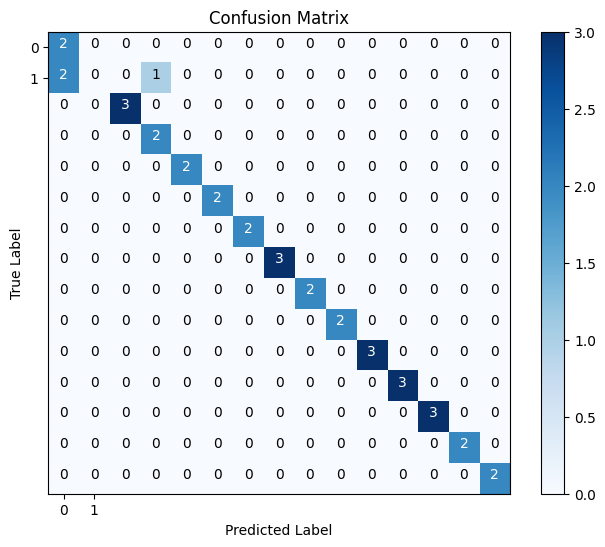


Testing Accuracy Score (Cross-Validation): 0.92
Testing F1 Score (Cross-Validation): 0.99
Testing Confusion Matrix (Cross-Validation):
 [[18  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
Testing Classification Report (Cross-Validation):
                                  precision    recall  f1-score   support

                  ARCHITECTURAL       1.00      1.00      1.00        18
                     COMMERCIAL       1.00      1.00      1.00        21
                  COMMISSIONING       1.00      1.00      1.00         4
                     CONSULTING       1.00      1.00      1.00        20
                DATA & SECURITY       1.00      1.00      1.00         4
              DESIGN MANAGEMENT       1.00

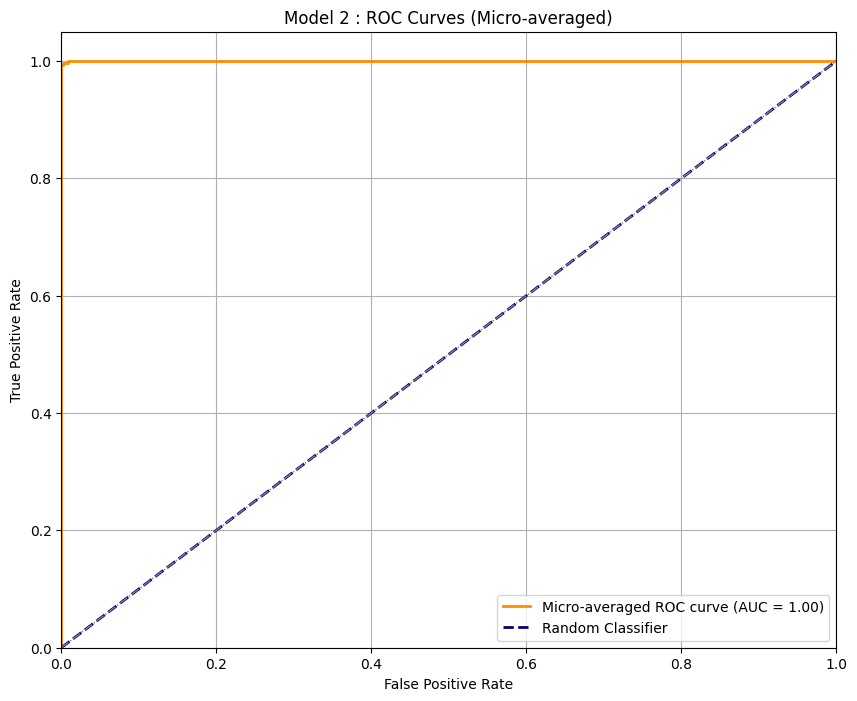

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import os

# Load the saved study object containing the best hyperparameters
study_file = "optuna_study_model2.pkl"
if os.path.exists(study_file):
    study = joblib.load(study_file)
else:
    raise FileNotFoundError(f"{study_file} not found. Please run the hyperparameter optimization process first.")


# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Define the pipeline with the best hyperparameters
model2_pipe_cv_2 = Pipeline([
    #('scaler_2', StandardScaler()),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(**best_params, random_state=42), n_jobs=-1))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model2_pipe_cv_2, X_train, y_train, cv=10)

# Print cross-validation scores
print("\nEvaluation Results of hyperparameter tuned model 2 to classify and select the department names")
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

# Fit the pipeline on the entire training data
model2_pipe_cv_2.fit(X_train, y_train)

################################################################ TRAINING DATA #################################################################

# Make predictions on training data
train_predictions_cv = model2_pipe_cv_2.predict(X_train)

# Implement logic to select the top N departments based on all input features for training data
train_department_predictions_cv = train_predictions_cv.copy()
for i, probabilities in enumerate(train_predictions_cv):
    num_departments = int(X_train.iloc[i]['Num_of_Departments'])
    top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
    train_department_predictions_cv[i, :] = 0  # Reset all predictions
    train_department_predictions_cv[i, top_n_departments_idx] = 1  # Set top N predictions to 1

# Evaluate the model on training data
train_accuracy_cv = accuracy_score(y_train, train_department_predictions_cv)
train_f1_cv = f1_score(y_train, train_department_predictions_cv, average='micro')
train_report_cv = classification_report(y_train, train_department_predictions_cv, target_names=y.columns)

print("\nTraining Accuracy Score (Cross-Validation):", train_accuracy_cv)
print("Training F1 Score (Cross-Validation):", train_f1_cv)

################################################################ TESTING DATA #################################################################

# Make predictions on test data
test_predictions_cv = model2_pipe_cv_2.predict(X_test)

# Implement logic to select the top N departments based on all input features for testing data
for i, probabilities in enumerate(test_predictions_cv):
    # Check if index i is within the bounds of X_test
    if i < len(X_test):
        # Sort departments by probability and set the top N to 1, rest to 0
        num_departments = int(X_test.iloc[i]['Num_of_Departments'])
        top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
        test_predictions_cv[i, :] = 0  # Reset all predictions
        test_predictions_cv[i, top_n_departments_idx] = 1  # Set top N predictions to 1
        
################################################################################################################################################################################

# Evaluate the model on testing data
test_accuracy_cv = accuracy_score(y_test, test_predictions_cv)
test_f1_cv = f1_score(y_test, test_predictions_cv, average='micro')
test_conf_matrix_cv = confusion_matrix(y_test.values.argmax(axis=1), test_predictions_cv.argmax(axis=1))
# Plot confusion matrix with annotations
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
unique_classes = np.unique(y)
tick_marks = np.arange(len(unique_classes))
plt.xticks(tick_marks, unique_classes)
plt.yticks(tick_marks, unique_classes)
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                horizontalalignment="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

test_report_cv = classification_report(y_test, test_predictions_cv, target_names=y.columns)

print("\nTesting Accuracy Score (Cross-Validation):", np.round(test_accuracy_cv, 2))
print("Testing F1 Score (Cross-Validation):", np.round(test_f1_cv, 2))
print("Testing Confusion Matrix (Cross-Validation):\n", test_conf_matrix_cv)
print("Testing Classification Report (Cross-Validation):\n", test_report_cv)

################################################################ PLOT ROC CURVES #################################################################

# Make predictions on test data probabilities
test_predictions_cv_proba = model2_pipe_cv_2.predict_proba(X_test)

# Extract probabilities for positive class from the predicted probabilities
y_score = np.array([class_prob[:, 1] for class_prob in test_predictions_cv_proba])

# Transpose y_score to match the shape of y_test
y_score = np.transpose(y_score)

# Calculate micro-averaged ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test.values.ravel(), np.array(y_score).ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-averaged ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label='Micro-averaged ROC curve (AUC = {:.2f})'.format(roc_auc_micro))

# Print ROC AUC for each department and plot ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0
num_departments_with_data = 0
for i in range(len(y.columns)):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], np.array(y_score)[:, i])
    if len(fpr) > 0 and len(tpr) > 0:
        roc_auc = auc(fpr, tpr)
        print('ROC AUC for {} department: {:.2f}'.format(y.columns[i], roc_auc))
        mean_tpr += np.interp(all_fpr, fpr, tpr)
        num_departments_with_data += 1

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Highlight the best fit line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='-.')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 2 : ROC Curves (Micro-averaged)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Plot learning curves
def plot_learning_curves(model, X_train, y_train, X_test, y_test, ylimb, ylimt):
    train_errors = []
    test_errors = []
    train_sizes = range(1, len(X_train) + 1)
    for m in train_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_pred))
        test_errors.append(accuracy_score(y_test, y_test_pred))
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
    plt.plot(train_sizes, test_errors, "b-", linewidth=2, label="test")
    plt.ylim(ylimb, ylimt)
    plt.title("Learning Curve (Hyperparameter Tuned Model 2)")
    plt.xlabel("Training instances")
    plt.ylabel("Accuracy")
    plt.legend()

plot_learning_curves(model2_pipe_cv_2, X_train, y_train, X_test, y_test, 0, 1.2)
plt.show()



In [70]:
test_predictions_cv

array([[1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0],
       [0, 1, 1, 0, 1

### Testing Model 2

In [167]:
import numpy as np

def predict_departments_from_user_input(model):
    """
    Predict departments based on user input using the provided model.

    Args:
    model (sklearn.pipeline.Pipeline): Trained pipeline model.

    Returns:
    numpy.ndarray: Predicted departments for the user-provided input.
    """
    # Get user input for features
    duration_hours = float(input("Enter Duration (in hours): "))
    total_order_intake = float(input("Enter Total Order Intake: "))
    duration_days = float(input("Enter Duration (in days): "))
    num_of_departments = int(input("Enter Number of Departments: "))

    # Calculate derived features
    work_intensity = total_order_intake / duration_hours
    department_diversity = total_order_intake / num_of_departments
    average_work_quantity_per_department = total_order_intake / num_of_departments

    # Create input data array
    input_data = np.array([[duration_hours, total_order_intake, duration_days,
                        work_intensity,department_diversity,average_work_quantity_per_department, num_of_departments]])

    # Make predictions using the model
    predictions = model.predict(input_data)

    # Implement logic to select the top N departments based on all input features
    department_predictions = predictions.copy()
    for i, probabilities in enumerate(predictions):
        num_departments = int(input_data[i][-1])  # Assuming the last feature is 'Num_of_Departments'
        top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
        department_predictions[i, :] = 0  # Reset all predictions
        department_predictions[i, top_n_departments_idx] = 1  # Set top N predictions to 1

    return department_predictions

# # Call the function with the trained model
# predicted_departments = predict_departments_from_user_input(model2_pipe_cv_2)
# print(predicted_departments)
# predicted_departments


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0]])

Predictions dataframe

In [72]:
# Define columns for the DataFrame
columns = y.columns.tolist()

# Create a DataFrame with these columns
predicted_df = pd.DataFrame(test_predictions_cv, columns=columns)

# Print the DataFrame
predicted_df.head()

,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS
0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
4,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0


### Output 3 - Total number of employees

In [73]:
resampled_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS,Num_of_Departments
0,1,Alpha Gateway Networks,6040.5,2116.7104,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,4,1,0,1,0,2,0,1,2,0,1,0,0,1,5,3,0,0,0,3,1,0,0,0,12
1,2,Beta Top Corporation,284691.0,339309.3941,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0,15
2,3,Chi Gateway Consultants,126.0,15.8268,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2
3,4,Chi Summit Technologies,9532.0,2785.9621,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,2,0,0,2,0,1,0,0,3,0,1,0,1,0,4,1,0,0,0,3,0,0,0,0,9
4,5,Epsilon Apex Partners,4907.0,602.0486,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,3,0,0,0,0,0,0,6


In [74]:
resampled_df.columns

Index(['Project_ID', 'Project_name', 'Duration_hours', 'Total_order_intake', 'Duration_days', 'Number_of_JobTitles', 'Number_of_Tasks', 'Num_of_Employees', 'Duration_to_Employees_Ratio', 'Work_Intensity', 'Department_diversity', 'JobTitle_diversity', 'Average_work_quantity_per_department', 'Average_Work_Quantity_per_Task', 'ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT', 'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT', 'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS', 'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL', 'VALIDATION & REGULATORY AFFAIRS', 'n_ARCHITECTURAL', 'n_COMMERCIAL', 'n_COMMISSIONING', 'n_CONSULTING', 'n_DATA & SECURITY', 'n_DESIGN MANAGEMENT', 'n_DEVELOPMENT', 'n_DOCUMENT CONTROL', 'n_ELECTRICAL', 'n_ESTIMATING', 'n_INDUSTRIAL MAINTENANCE', 'n_MANAGEMENT',
       'n_MANAGE

In [75]:
# Define features and target variable
# X = final_1_df.drop(['Project_ID', 'Project_name', 'Num_of_Employees',], axis=1)
X = resampled_df[['Duration_hours', 'Total_order_intake', 'Duration_days', 'Work_Intensity', 'Department_diversity', 'Average_work_quantity_per_department','ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT', 'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT', 'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS', 'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL', 'VALIDATION & REGULATORY AFFAIRS','Num_of_Departments']]
y = resampled_df[['Num_of_Employees']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

##### Normal-oversampled model 3

Cross-Validation Scores (Negative MSE): [-0.10512353 -0.80857059 -3.44281875 -4.67283125 -3.74310625 -0.0236
 -2.20498125 -0.1376     -1.94138125 -0.38709375]
Average Cross-Validation Score (Negative MSE): -1.746710661764706

Training Mean Squared Error (Cross-Validation): 0.2345679012345679
Training Root Mean Squared Error (Cross-Validation): 0.4843221048378526
Training Mean Absolute Error (Cross-Validation): 0.14814814814814814
Training R-squared Score (Cross-Validation): 0.9997378623921488
Training Adjusted R-squared Score (Cross-Validation): 0.9996753526548919

Testing Mean Squared Error (Cross-Validation): 0.1111111111111111
Testing Root Mean Squared Error (Cross-Validation): 0.3333333333333333
Testing Mean Absolute Error (Cross-Validation): 0.1111111111111111
Testing R-squared Score (Cross-Validation): 0.9998947383810178
Testing Adjusted R-squared Score (Cross-Validation): 1.0001278176801927


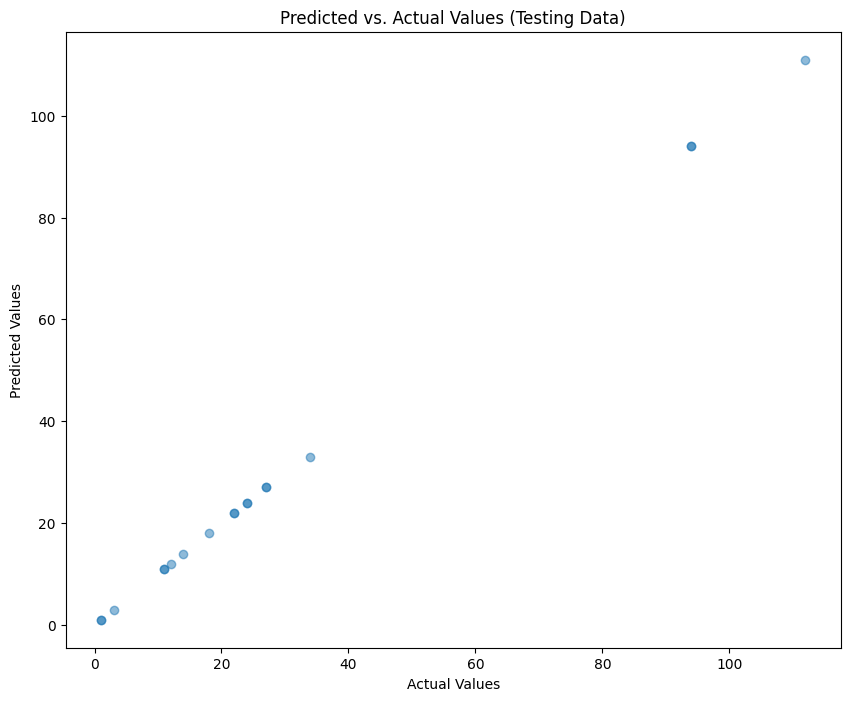

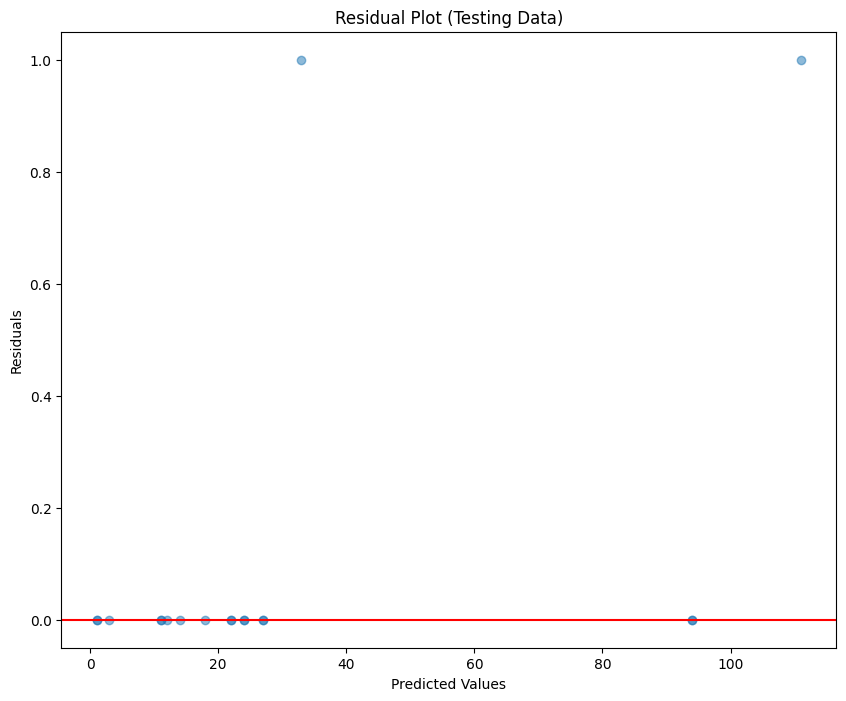

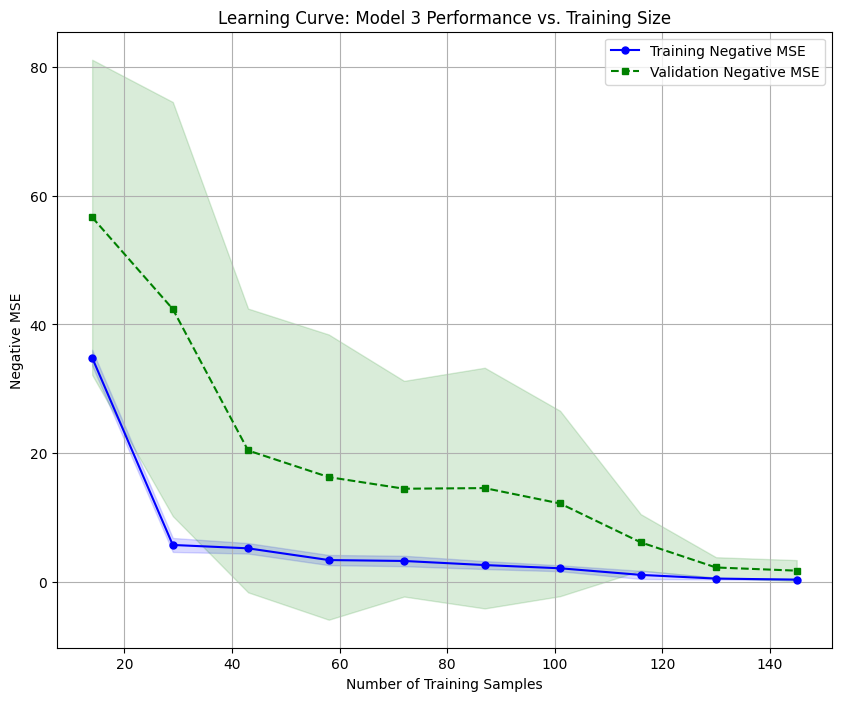

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define the pipeline 
model3_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model3_pipe_cv, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Print cross-validation scores
print("Cross-Validation Scores (Negative MSE):", cv_scores)
print("Average Cross-Validation Score (Negative MSE):", np.mean(cv_scores))

# Fit the pipeline on the entire training data
model3_pipe_cv.fit(X_train, y_train)

# Training prediction
train_predictions_cv = model3_pipe_cv.predict(X_train)
# Round off the predictions
train_predictions_cv = np.round(train_predictions_cv).astype(int)

# Calculate evaluation metrics for training data
train_mse_cv = mean_squared_error(y_train, train_predictions_cv)
train_rmse_cv = np.sqrt(train_mse_cv)
train_mae_cv = mean_absolute_error(y_train, train_predictions_cv)
train_r2_cv = r2_score(y_train, train_predictions_cv)
n = len(X_train)
p = X_train.shape[1]
train_adj_r2_cv = 1 - (1 - train_r2_cv) * ((n - 1) / (n - p - 1))

print("\nTraining Mean Squared Error (Cross-Validation):", train_mse_cv)
print("Training Root Mean Squared Error (Cross-Validation):", train_rmse_cv)
print("Training Mean Absolute Error (Cross-Validation):", train_mae_cv)
print("Training R-squared Score (Cross-Validation):", train_r2_cv)
print("Training Adjusted R-squared Score (Cross-Validation):", train_adj_r2_cv)

# Testing prediction
test_predictions_cv = model3_pipe_cv.predict(X_test)
# Round off the predictions
test_predictions_cv = np.round(test_predictions_cv).astype(int)

# Calculate evaluation metrics for testing data
test_mse_cv = mean_squared_error(y_test, test_predictions_cv)
test_rmse_cv = np.sqrt(test_mse_cv)
test_mae_cv = mean_absolute_error(y_test, test_predictions_cv)
test_r2_cv = r2_score(y_test, test_predictions_cv)
n = len(X_test)
p = X_test.shape[1]
test_adj_r2_cv = 1 - (1 - test_r2_cv) * ((n - 1) / (n - p - 1))

print("\nTesting Mean Squared Error (Cross-Validation):", test_mse_cv)
print("Testing Root Mean Squared Error (Cross-Validation):", test_rmse_cv)
print("Testing Mean Absolute Error (Cross-Validation):", test_mae_cv)
print("Testing R-squared Score (Cross-Validation):", test_r2_cv)
print("Testing Adjusted R-squared Score (Cross-Validation):", test_adj_r2_cv)

# Scatter plot of predicted vs. actual values for testing data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, test_predictions_cv, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Testing Data)')
plt.show()

# Residual plot for testing data

# Convert y_test and test_predictions_cv to NumPy arrays
y_test_array = y_test.to_numpy().reshape(-1)
test_predictions_cv_array = test_predictions_cv.reshape(-1)

# Calculate residuals
residuals = y_test_array - test_predictions_cv_array

# Plot residual plot for testing data
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions_cv_array, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Testing Data)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model3_pipe_cv, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)  # Negate scores to convert them back to positive
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate scores to convert them back to positive
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Negative MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Negative MSE')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative MSE')
plt.title('Learning Curve: Model 3 Performance vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

##### Hyperparameter Tuning - MODEL 3

Best Hyperparameters: {'n_estimators': 64, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}

Training Mean Squared Error (Cross-Validation): 0.2222222222222222
Training Root Mean Squared Error (Cross-Validation): 0.4714045207910317
Training Mean Absolute Error (Cross-Validation): 0.13580246913580246
Training R-squared Score (Cross-Validation): 0.9997516591083514
Training Adjusted R-squared Score (Cross-Validation): 0.9996924393572659

Testing Mean Squared Error (Cross-Validation): 0.05555555555555555
Testing Root Mean Squared Error (Cross-Validation): 0.23570226039551584
Testing Mean Absolute Error (Cross-Validation): 0.05555555555555555
Testing R-squared Score (Cross-Validation): 0.9999473691905089
Testing Adjusted R-squared Score (Cross-Validation): 1.0000639088400964


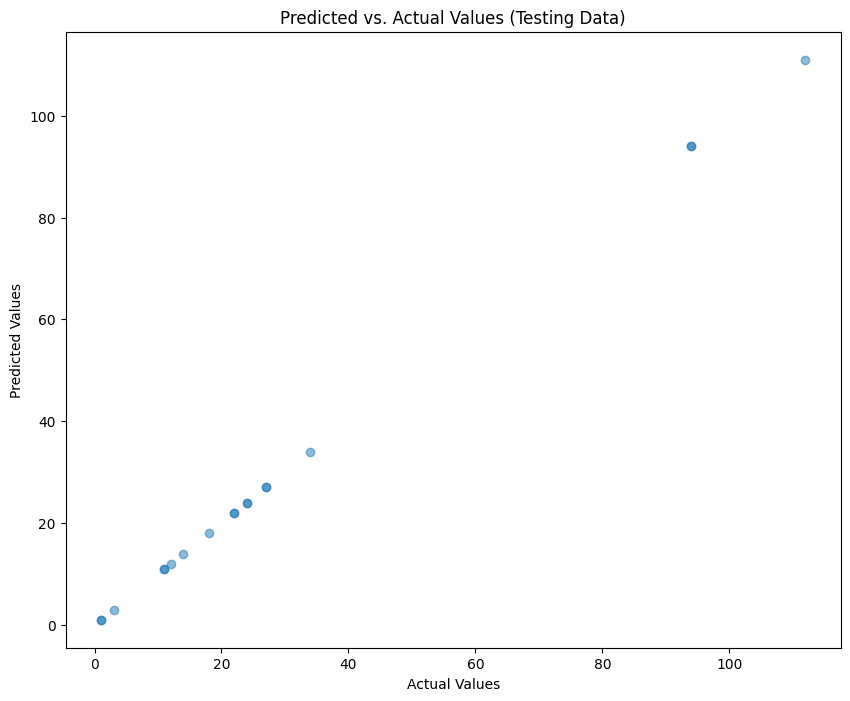

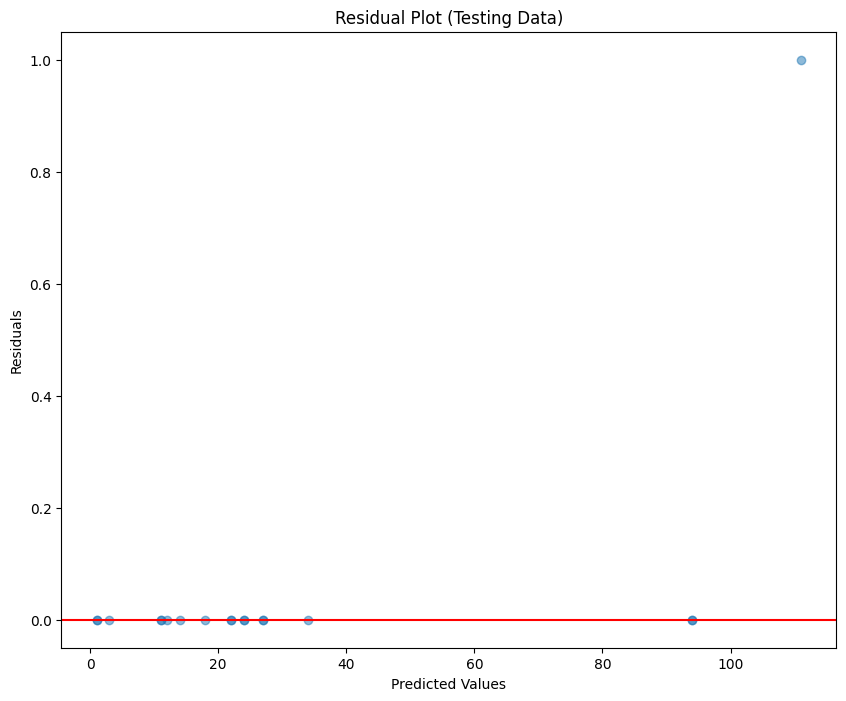

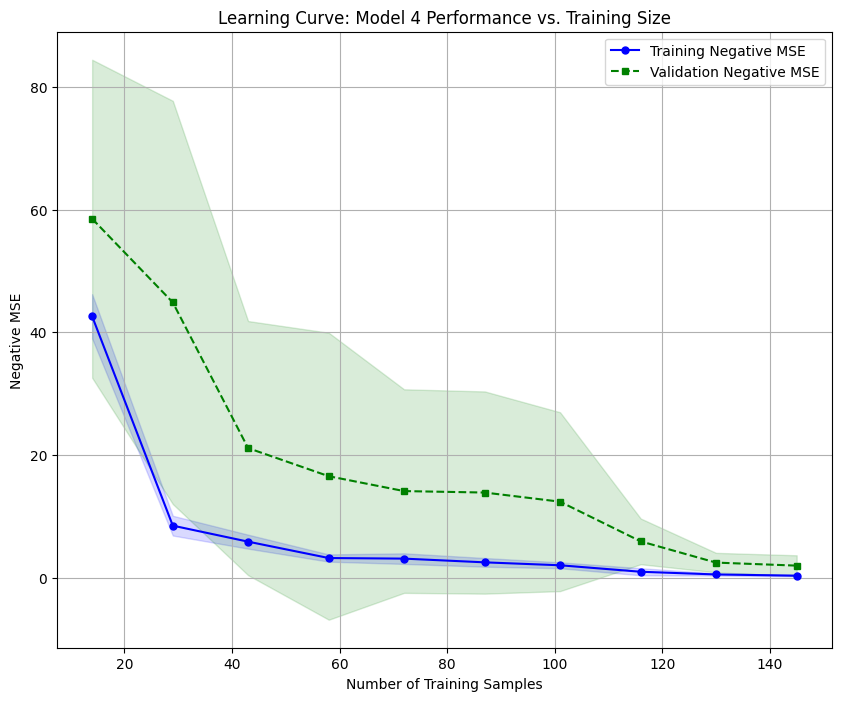

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import optuna
import joblib
import os

# Define the objective function for hyperparameter optimization
def objective(trial):
    # Define the search space for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # Create a RandomForestRegressor with the suggested hyperparameters
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Evaluate the regressor using cross-validation
    score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

# Check if study.pkl exists before creating/loading study object
study_file = "study_model4.pkl"
if os.path.exists(study_file):
    study = joblib.load(study_file)
else:
    # Perform hyperparameter optimization using Optuna
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)
    joblib.dump(study, study_file)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Define the pipeline with the best hyperparameters
model3_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(**best_params, random_state=42))
])

#________________________________________________________________

# Fit the pipeline on the entire training data
model3_pipe_cv.fit(X_train, y_train)

# Training prediction
train_predictions_cv = model3_pipe_cv.predict(X_train)
# Round off the predictions
train_predictions_cv = np.round(train_predictions_cv).astype(int)

# Calculate evaluation metrics for training data
train_mse_cv = mean_squared_error(y_train, train_predictions_cv)
train_rmse_cv = np.sqrt(train_mse_cv)
train_mae_cv = mean_absolute_error(y_train, train_predictions_cv)
train_r2_cv = r2_score(y_train, train_predictions_cv)
n = len(X_train)
p = X_train.shape[1]
train_adj_r2_cv = 1 - (1 - train_r2_cv) * ((n - 1) / (n - p - 1))

print("\nTraining Mean Squared Error (Cross-Validation):", train_mse_cv)
print("Training Root Mean Squared Error (Cross-Validation):", train_rmse_cv)
print("Training Mean Absolute Error (Cross-Validation):", train_mae_cv)
print("Training R-squared Score (Cross-Validation):", train_r2_cv)
print("Training Adjusted R-squared Score (Cross-Validation):", train_adj_r2_cv)

# Testing prediction
test_predictions_cv = model3_pipe_cv.predict(X_test)
# Round off the predictions
test_predictions_cv = np.round(test_predictions_cv).astype(int)

# Calculate evaluation metrics for testing data
test_mse_cv = mean_squared_error(y_test, test_predictions_cv)
test_rmse_cv = np.sqrt(test_mse_cv)
test_mae_cv = mean_absolute_error(y_test, test_predictions_cv)
test_r2_cv = r2_score(y_test, test_predictions_cv)
n = len(X_test)
p = X_test.shape[1]
test_adj_r2_cv = 1 - (1 - test_r2_cv) * ((n - 1) / (n - p - 1))

print("\nTesting Mean Squared Error (Cross-Validation):", test_mse_cv)
print("Testing Root Mean Squared Error (Cross-Validation):", test_rmse_cv)
print("Testing Mean Absolute Error (Cross-Validation):", test_mae_cv)
print("Testing R-squared Score (Cross-Validation):", test_r2_cv)
print("Testing Adjusted R-squared Score (Cross-Validation):", test_adj_r2_cv)

# Scatter plot of predicted vs. actual values for testing data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, test_predictions_cv, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Testing Data)')
plt.show()

# Residual plot for testing data

# Convert y_test and test_predictions_cv to NumPy arrays
y_test_array = y_test.to_numpy().reshape(-1)
test_predictions_cv_array = test_predictions_cv.reshape(-1)

# Calculate residuals
residuals = y_test_array - test_predictions_cv_array

# Plot residual plot for testing data
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions_cv_array, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Testing Data)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model3_pipe_cv, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)  # Negate scores to convert them back to positive
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate scores to convert them back to positive
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Negative MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Negative MSE')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative MSE')
plt.title('Learning Curve: Model 4 Performance vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

#### Predictions

In [78]:
# Convert y_test to a 1-dimensional NumPy array
y_test_array = y_test.values.flatten()

# Create the DataFrame
evaluation_df = pd.DataFrame({
    'Actual num_employees_per_project': y_test_array,
    'Predicted num_employees_per_project': test_predictions_cv
})

# Display the DataFrame
evaluation_df


,Actual num_employees_per_project,Predicted num_employees_per_project
0,22,22
1,1,1
2,112,111
3,34,34
4,27,27
5,94,94
6,14,14
7,11,11
8,22,22
9,24,24


### Testing Model 3

In [168]:
import numpy as np

def predict_number_of_employees(model3):
    """
    Predict number of employees based on user input and predictions from Model 2.

    Args:
    model2 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 2.
    model3 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 3.

    Returns:
    int: Predicted number of employees.
    """
    # Get user input for features
    duration_hours = float(input("Enter Duration (in hours): "))
    total_order_intake = float(input("Enter Total Order Intake: "))
    duration_days = float(input("Enter Duration (in days): "))
    # Get user input for number of departments
    num_of_departments = float(input("Enter Number of Departments: "))

    # Calculate derived features
    work_intensity = total_order_intake / duration_hours
    department_diversity = total_order_intake / num_of_departments
    average_work_quantity_per_department = total_order_intake / num_of_departments

    # Prepare input for Model 2
    input_data_model2 = np.array([[duration_hours, total_order_intake, duration_days,
                                work_intensity, department_diversity,
                                average_work_quantity_per_department]])

    # Make predictions using Model 2
    predicted_departments = predict_departments_from_user_input(model2_pipe_cv_2
                                                                )


    # Prepare input for Model 3
    input_data_model3 = np.concatenate((input_data_model2, predicted_departments, [[num_of_departments]]), axis=1)

    # Make prediction using Model 3
    predicted_number_of_employees = model3.predict(input_data_model3)

    return predicted_number_of_employees

# # Call the function with the trained models for Model 2 and Model 3
# predicted_number_of_employees = predict_number_of_employees(model3_pipe_cv)
# print("Predicted Number of Employees:", predicted_number_of_employees)


Predicted Number of Employees: [22.953125]


### Output 4: Number of Employees in each department

In [80]:
resampled_df.head()

,Project_ID,Project_name,Duration_hours,Total_order_intake,Duration_days,Number_of_JobTitles,Number_of_Tasks,Num_of_Employees,Duration_to_Employees_Ratio,Work_Intensity,Department_diversity,JobTitle_diversity,Average_work_quantity_per_department,Average_Work_Quantity_per_Task,ARCHITECTURAL,COMMERCIAL,COMMISSIONING,CONSULTING,DATA & SECURITY,DESIGN MANAGEMENT,DEVELOPMENT,DOCUMENT CONTROL,ELECTRICAL,ESTIMATING,INDUSTRIAL MAINTENANCE,MANAGEMENT,MANAGEMENT & ADMIN,MANAGEMENT ACCOUNTS,MECHANICAL,OPERATIVE,PLANNING,PROCESS,PROCUREMENT,PROJECT MANAGEMENT,"QUALITY, SAFETY & ENVIRONMENT",SERVICES,TECHNICAL,VALIDATION & REGULATORY AFFAIRS,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS,Num_of_Departments
0,1,Alpha Gateway Networks,6040.5,2116.7104,674,22,3,25,26.960000,8.962166,0.500000,0.167939,503.375000,2013.500000,1,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,4,1,0,1,0,2,0,1,2,0,1,0,0,1,5,3,0,0,0,3,1,0,0,0,12
1,2,Beta Top Corporation,284691.0,339309.3941,1146,72,8,112,10.232143,248.421466,0.625000,0.549618,18979.400000,35586.375000,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,0,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0,15
2,3,Chi Gateway Consultants,126.0,15.8268,1108,3,2,3,369.333333,0.113718,0.083333,0.022901,63.000000,63.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2
3,4,Chi Summit Technologies,9532.0,2785.9621,1143,17,12,18,63.500000,8.339458,0.375000,0.129771,1059.111111,794.333333,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,2,0,0,2,0,1,0,0,3,0,1,0,1,0,4,1,0,0,0,3,0,0,0,0,9
4,5,Epsilon Apex Partners,4907.0,602.0486,648,11,1,11,58.909091,7.572531,0.250000,0.083969,817.833333,4907.000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,3,0,0,0,0,0,0,6


In [200]:
## Modelling for output 4

# Step 1: Prepare data
X = resampled_df[['Duration_hours', 'Total_order_intake', 'Duration_days', 'Num_of_Employees', 
                'Duration_to_Employees_Ratio', 'Work_Intensity', 'Department_diversity', 'Average_work_quantity_per_department', 
                'ARCHITECTURAL', 'COMMERCIAL', 'COMMISSIONING', 'CONSULTING', 'DATA & SECURITY', 'DESIGN MANAGEMENT', 
                'DEVELOPMENT', 'DOCUMENT CONTROL', 'ELECTRICAL', 'ESTIMATING', 'INDUSTRIAL MAINTENANCE', 'MANAGEMENT', 'MANAGEMENT & ADMIN', 'MANAGEMENT ACCOUNTS', 
                'MECHANICAL', 'OPERATIVE', 'PLANNING', 'PROCESS', 'PROCUREMENT', 'PROJECT MANAGEMENT', 'QUALITY, SAFETY & ENVIRONMENT', 'SERVICES', 'TECHNICAL', 
                'VALIDATION & REGULATORY AFFAIRS','Num_of_Departments']]

y = resampled_df[['n_ARCHITECTURAL','n_COMMERCIAL', 'n_COMMISSIONING', 'n_CONSULTING',
                'n_DATA & SECURITY', 'n_DESIGN MANAGEMENT', 'n_DEVELOPMENT',
                'n_DOCUMENT CONTROL', 'n_ELECTRICAL', 'n_ESTIMATING',
                'n_INDUSTRIAL MAINTENANCE', 'n_MANAGEMENT',
                'n_MANAGEMENT & ADMIN', 'n_MANAGEMENT ACCOUNTS',
                'n_MECHANICAL', 'n_OPERATIVE', 'n_PLANNING', 'n_PROCESS',
                'n_PROCUREMENT', 'n_PROJECT MANAGEMENT',
                'n_QUALITY, SAFETY & ENVIRONMENT', 'n_SERVICES', 'n_TECHNICAL',
                'n_VALIDATION & REGULATORY AFFAIRS']] 

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Calculate the value counts for each variable in each column of y
for column in y.columns:
    print("Column:", column)
    print(y[column].value_counts())
    print()


Column: n_ARCHITECTURAL
n_ARCHITECTURAL
0    83
1    45
2    28
4    12
6    12
Name: count, dtype: int64

Column: n_COMMERCIAL
n_COMMERCIAL
0    76
1    68
3    24
4    12
Name: count, dtype: int64

Column: n_COMMISSIONING
n_COMMISSIONING
0    156
7     17
3      7
Name: count, dtype: int64

Column: n_CONSULTING
n_CONSULTING
0    89
2    52
1    39
Name: count, dtype: int64

Column: n_DATA & SECURITY
n_DATA & SECURITY
0    155
2     19
4      5
1      1
Name: count, dtype: int64

Column: n_DESIGN MANAGEMENT
n_DESIGN MANAGEMENT
0    88
1    80
2    12
Name: count, dtype: int64

Column: n_DEVELOPMENT
n_DEVELOPMENT
0    151
1     24
2      5
Name: count, dtype: int64

Column: n_DOCUMENT CONTROL
n_DOCUMENT CONTROL
0    88
1    56
2    31
4     5
Name: count, dtype: int64

Column: n_ELECTRICAL
n_ELECTRICAL
1    60
0    48
2    24
3    12
8    12
5    12
6     7
7     5
Name: count, dtype: int64

Column: n_ESTIMATING
n_ESTIMATING
0    154
1     20
2      6
Name: count, dtype: int64

Column:

In [83]:
# Calculate the value counts for each variable in each column of y
for column in y_train.columns:
    print("Column:", column)
    print(y_train[column].value_counts())
    print()

Column: n_ARCHITECTURAL
n_ARCHITECTURAL
0    65
1    37
2    21
4    11
6    10
Name: count, dtype: int64

Column: n_COMMERCIAL
n_COMMERCIAL
0    61
1    53
3    20
4    10
Name: count, dtype: int64

Column: n_COMMISSIONING
n_COMMISSIONING
0    124
7     13
3      7
Name: count, dtype: int64

Column: n_CONSULTING
n_CONSULTING
0    73
2    39
1    32
Name: count, dtype: int64

Column: n_DATA & SECURITY
n_DATA & SECURITY
0    123
2     17
4      3
1      1
Name: count, dtype: int64

Column: n_DESIGN MANAGEMENT
n_DESIGN MANAGEMENT
0    70
1    63
2    11
Name: count, dtype: int64

Column: n_DEVELOPMENT
n_DEVELOPMENT
0    121
1     20
2      3
Name: count, dtype: int64

Column: n_DOCUMENT CONTROL
n_DOCUMENT CONTROL
0    71
1    43
2    27
4     3
Name: count, dtype: int64

Column: n_ELECTRICAL
n_ELECTRICAL
1    48
0    38
2    19
8    10
5    10
3     9
6     7
7     3
Name: count, dtype: int64

Column: n_ESTIMATING
n_ESTIMATING
0    123
1     17
2      4
Name: count, dtype: int64

Column:

In [84]:
# Calculate the value counts for each variable in each column of y
for column in y_test.columns:
    print("Column:", column)
    print(y_test[column].value_counts())
    print()

Column: n_ARCHITECTURAL
n_ARCHITECTURAL
0    18
1     8
2     7
6     2
4     1
Name: count, dtype: int64

Column: n_COMMERCIAL
n_COMMERCIAL
1    15
0    15
3     4
4     2
Name: count, dtype: int64

Column: n_COMMISSIONING
n_COMMISSIONING
0    32
7     4
Name: count, dtype: int64

Column: n_CONSULTING
n_CONSULTING
0    16
2    13
1     7
Name: count, dtype: int64

Column: n_DATA & SECURITY
n_DATA & SECURITY
0    32
4     2
2     2
Name: count, dtype: int64

Column: n_DESIGN MANAGEMENT
n_DESIGN MANAGEMENT
0    18
1    17
2     1
Name: count, dtype: int64

Column: n_DEVELOPMENT
n_DEVELOPMENT
0    30
1     4
2     2
Name: count, dtype: int64

Column: n_DOCUMENT CONTROL
n_DOCUMENT CONTROL
0    17
1    13
2     4
4     2
Name: count, dtype: int64

Column: n_ELECTRICAL
n_ELECTRICAL
1    12
0    10
2     5
3     3
7     2
8     2
5     2
Name: count, dtype: int64

Column: n_ESTIMATING
n_ESTIMATING
0    31
1     3
2     2
Name: count, dtype: int64

Column: n_INDUSTRIAL MAINTENANCE
n_INDUSTRIA

#### Untuned model 4 ( on oversampled dataset)

Cross-Validation MSE Scores: [0.36065417 0.0992079  0.1608898  0.04061882 0.05136176]
Mean Cross-Validation MSE: 0.1425464891215107

Training Mean Absolute Error: 0.020396412037037032
Training Mean Squared Error: 0.01523272569444444
Training Root Mean Squared Error: 0.12342092891582221
Training R-squared (R2) Score: 0.9945081317750936

Testing Mean Absolute Error: 0.02199074074074074
Testing Mean Squared Error: 0.03356481481481482
Testing Root Mean Squared Error: 0.183207027198235
Testing R-squared (R2) Score: 0.997569896429122
Testing Adjusted R-squared (Adjusted R2) Score: 0.9574731875096345


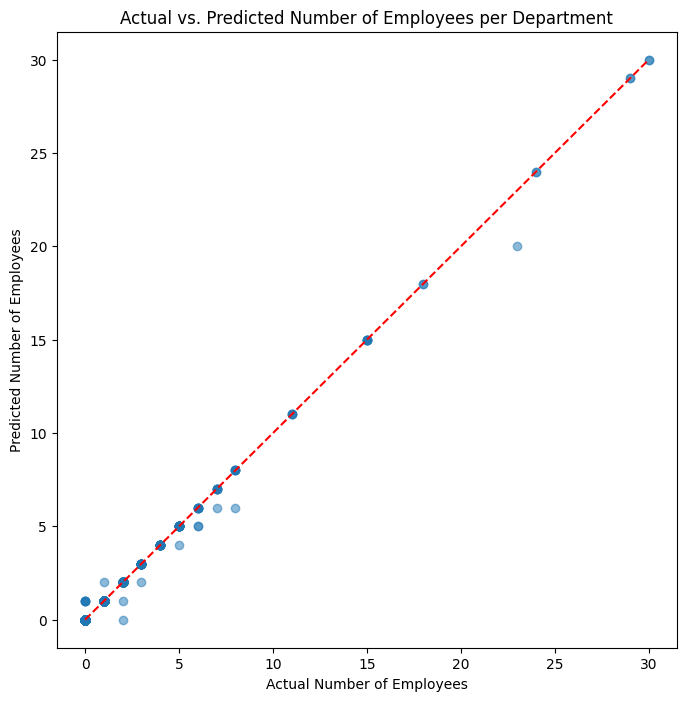

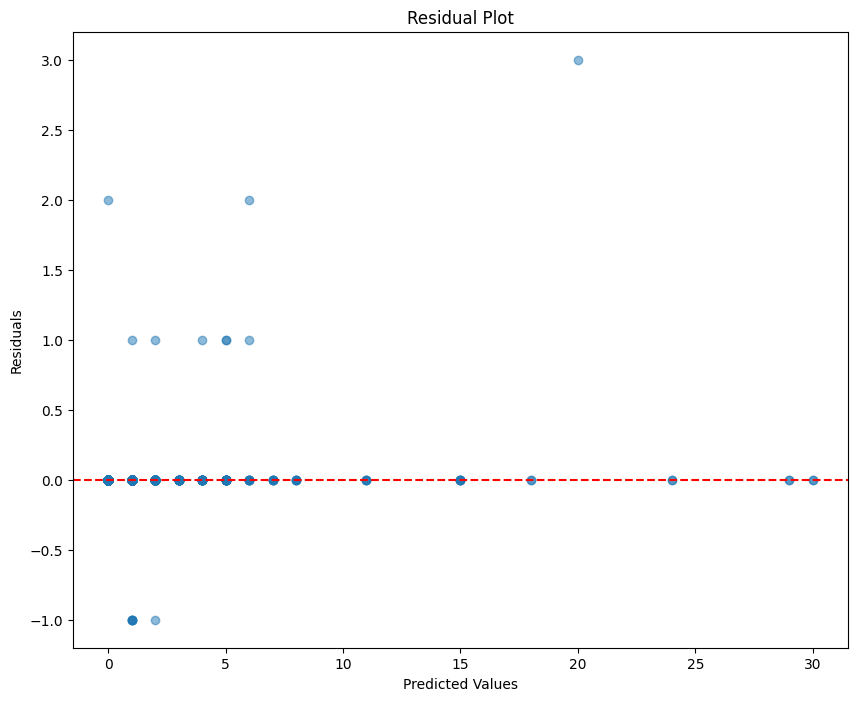

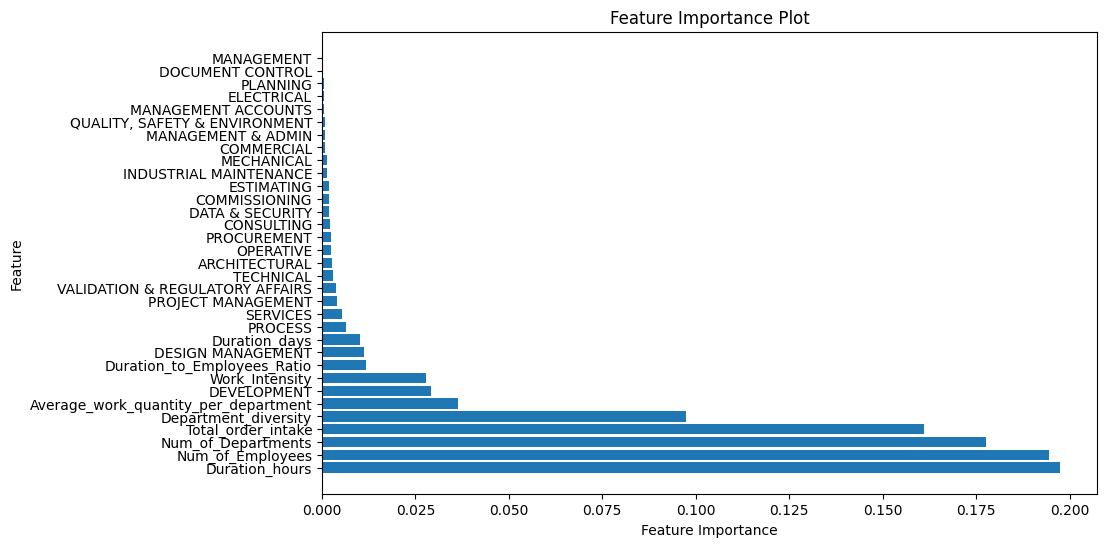

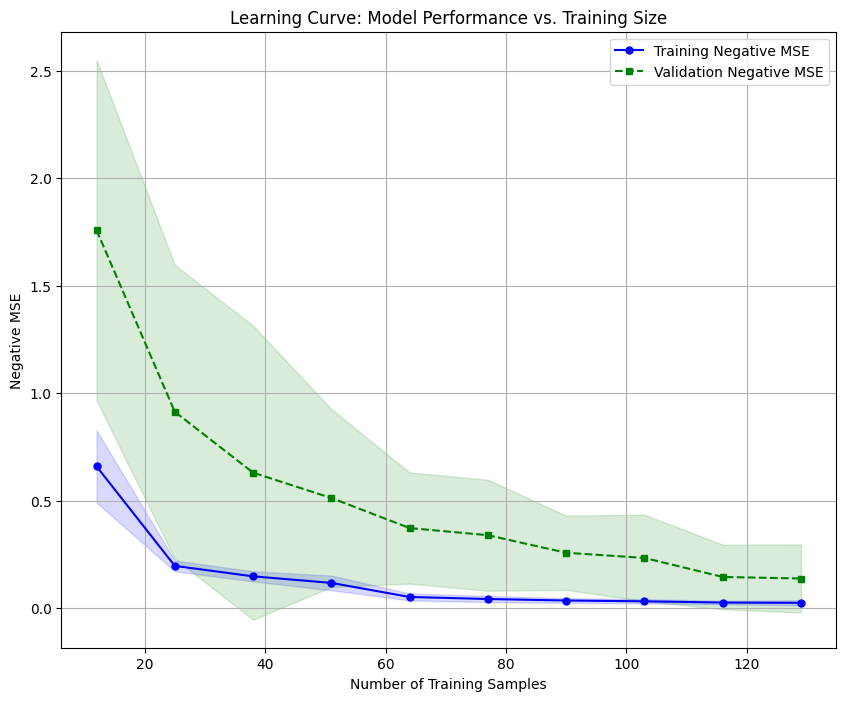

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define the pipeline with standard scaler and Random Forest Regressor model
model4_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Apply cross-validation on the training data
cv_scores = cross_val_score(model4_pipe_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean Cross-Validation MSE:", -cv_scores.mean())

# Fit the pipeline on the entire training data
model4_pipe_cv.fit(X_train, y_train)

# Make predictions on training data
train_predictions = model4_pipe_cv.predict(X_train)

# Evaluate the model on training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)
print("\nTraining Mean Absolute Error:", train_mae)
print("Training Mean Squared Error:", train_mse)
print("Training Root Mean Squared Error:", train_rmse)
print("Training R-squared (R2) Score:", train_r2)

#################################################################################################################################################

# Make predictions on test data
test_predictions = model4_pipe_cv.predict(X_test)
#Round off the predictions
test_predictions = np.round(test_predictions).astype(int)

# Evaluate the model on testing data
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)
print("\nTesting Mean Absolute Error:", test_mae)
print("Testing Mean Squared Error:", test_mse)
print("Testing Root Mean Squared Error:", test_rmse)
print("Testing R-squared (R2) Score:", test_r2)

# Calculate the number of predictors (features)
num_predictors = X.shape[1]

# Calculate the total number of samples
num_samples = len(y_test)

# Calculate the Adjusted R-squared (Adjusted R2) score for testing data
test_adjusted_r2 = 1 - (1 - test_r2) * ((num_samples - 1) / (num_samples - num_predictors - 1))
print("Testing Adjusted R-squared (Adjusted R2) Score:", test_adjusted_r2)

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test.values.flatten(), test_predictions.flatten(), alpha=0.5)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Number of Employees per Department")
plt.xlabel("Actual Number of Employees")
plt.ylabel("Predicted Number of Employees")
plt.show()

# Calculate residuals
residuals = y_test.values.flatten() - test_predictions.flatten()

# Create residual plot
plt.figure(figsize=(10, 8))
plt.scatter(test_predictions.flatten(), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


# Feature Importance
feature_importance = model4_pipe_cv.named_steps['regressor'].feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=model4_pipe_cv, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)  # Negate scores to convert them back to positive
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)  # Negate scores to convert them back to positive
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Negative MSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Negative MSE')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Negative MSE')
plt.title('Learning Curve: Model Performance vs. Training Size')
plt.legend()
plt.grid(True)
plt.show()

#### Hyper parameter tuning - MODEL 4

In [274]:
from sklearn.metrics import hamming_loss, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import os

# Load the saved study object containing the best hyperparameters
study_file = "optuna_study_model2.pkl"
if os.path.exists(study_file):
    study = joblib.load(study_file)
else:
    raise FileNotFoundError(f"{study_file} not found. Please run the hyperparameter optimization process first.")


# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Define the pipeline with the best hyperparameters
model4_pipe_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MultiOutputClassifier(RandomForestClassifier(**best_params, random_state=42), n_jobs=-1))
])

# Step 5: Train the model
model4_pipe_cv.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model4_pipe_cv.predict(X_test)

# Convert y_pred to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)
# Convert y_test to array
y_test_array = np.array(y_test)

##################################################################################

# Calculate accuracy for each output
accuracies = {}
for column in y_test.columns:
    accuracy = accuracy_score(y_test[column], y_pred_df[column])
    accuracies[column] = accuracy

# Print accuracies for each output
for column, accuracy in accuracies.items():
    print(f"Accuracy for {column}: {accuracy}")

# Step 7: Evaluate the model
# Initialize lists to store metrics for each type of target
hamming_losses = []
precisions = []
recalls = []
f1_scores = []

# Iterate over each target type
for i in range(y_test_array.shape[1]):
    # Extract predictions and true labels for the current target type
    y_pred_target = y_pred[:, i]
    y_test_target = y_test_array[:, i]
    
    # Compute metrics for the current target type
    hamming_loss_target = hamming_loss(y_test_target, y_pred_target)
    precision_target = precision_score(y_test_target, y_pred_target, average='micro')
    recall_target = recall_score(y_test_target, y_pred_target, average='micro')
    f1_score_target = f1_score(y_test_target, y_pred_target, average='micro')
    
    # Append metrics to the lists
    hamming_losses.append(hamming_loss_target)
    precisions.append(precision_target)
    recalls.append(recall_target)
    f1_scores.append(f1_score_target)

# Print the computed metrics for each type of target
for i in range(y_test_array.shape[1]):
    print(f"\nEvaluation results for Target {i+1}:")
    print("Hamming Loss:", hamming_losses[i])
    print("Precision:", precisions[i])
    print("Recall:", recalls[i])
    print("F1 Score:", f1_scores[i])


Best Hyperparameters: {'n_estimators': 197, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 1}
Accuracy for n_ARCHITECTURAL: 1.0
Accuracy for n_COMMERCIAL: 1.0
Accuracy for n_COMMISSIONING: 1.0
Accuracy for n_CONSULTING: 1.0
Accuracy for n_DATA & SECURITY: 1.0
Accuracy for n_DESIGN MANAGEMENT: 1.0
Accuracy for n_DEVELOPMENT: 1.0
Accuracy for n_DOCUMENT CONTROL: 1.0
Accuracy for n_ELECTRICAL: 1.0
Accuracy for n_ESTIMATING: 1.0
Accuracy for n_INDUSTRIAL MAINTENANCE: 0.9722222222222222
Accuracy for n_MANAGEMENT: 1.0
Accuracy for n_MANAGEMENT & ADMIN: 1.0
Accuracy for n_MANAGEMENT ACCOUNTS: 1.0
Accuracy for n_MECHANICAL: 1.0
Accuracy for n_OPERATIVE: 0.9444444444444444
Accuracy for n_PLANNING: 1.0
Accuracy for n_PROCESS: 1.0
Accuracy for n_PROCUREMENT: 1.0
Accuracy for n_PROJECT MANAGEMENT: 0.9444444444444444
Accuracy for n_QUALITY, SAFETY & ENVIRONMENT: 1.0
Accuracy for n_SERVICES: 1.0
Accuracy for n_TECHNICAL: 1.0
Accuracy for n_VALIDATION & REGULATORY AFFAIRS: 1.0

Evaluati

In [239]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def calculate_accuracy(y_true, y_pred):
    accuracies = {}
    for i in range(y_true.shape[1]):
        accuracy = accuracy_score(y_true[:, i], y_pred[:, i])
        accuracies[i] = accuracy
    average_accuracy = np.mean(list(accuracies.values()))
    return average_accuracy

def calculate_f1_score(y_true, y_pred):
    f1_scores = {}
    for i in range(y_true.shape[1]):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average='weighted')  # Use weighted average for multiclass
        f1_scores[i] = f1
    average_f1_score = np.mean(list(f1_scores.values()))
    return average_f1_score

# Calculate average train accuracy and F1 score
train_accuracy = calculate_accuracy(np.array(y_train), model4_pipe_cv.predict(X_train))
train_f1_score = calculate_f1_score(np.array(y_train), model4_pipe_cv.predict(X_train))

# Calculate average test accuracy and F1 score
test_accuracy = calculate_accuracy(np.array(y_test), model4_pipe_cv.predict(X_test))
test_f1_score = calculate_f1_score(np.array(y_test), model4_pipe_cv.predict(X_test))

# Print average train accuracy and F1 score
print("\nAverage Train Accuracy:", train_accuracy)
print("Average Train F1 Score:", train_f1_score)

# Print average test accuracy and F1 score
print("\nAverage Test Accuracy:", test_accuracy)
print("Average Test F1 Score:", test_f1_score)

# Classification report for test data
classification_reports = {}
for column in y_test.columns:
    class_report = classification_report(y_test[column], y_pred_df[column], output_dict=True)
    classification_reports[column] = class_report

# Print classification reports for each output
for column, class_report in classification_reports.items():
    print(f"\nClassification Report for {column}:")
    print(class_report)


Average Train Accuracy: 1.0
Average Train F1 Score: 1.0

Average Test Accuracy: 0.9942129629629631
Average Test F1 Score: 0.9955200444375282

Classification Report for n_ARCHITECTURAL:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36.0}}

Classification Report for n_COMMERCIAL:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4.0}, 

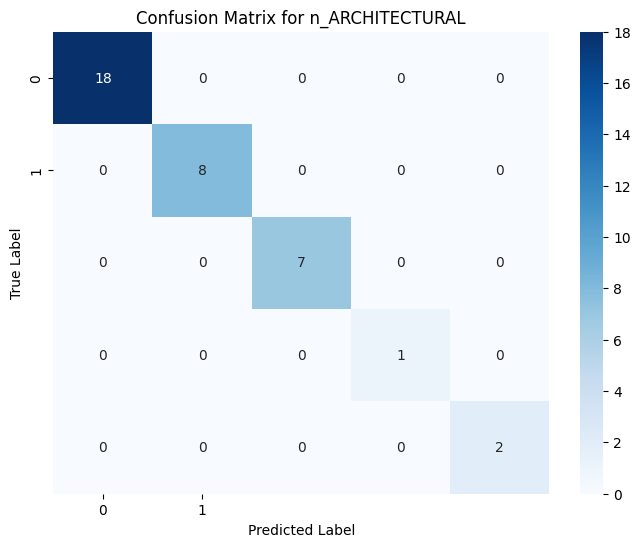

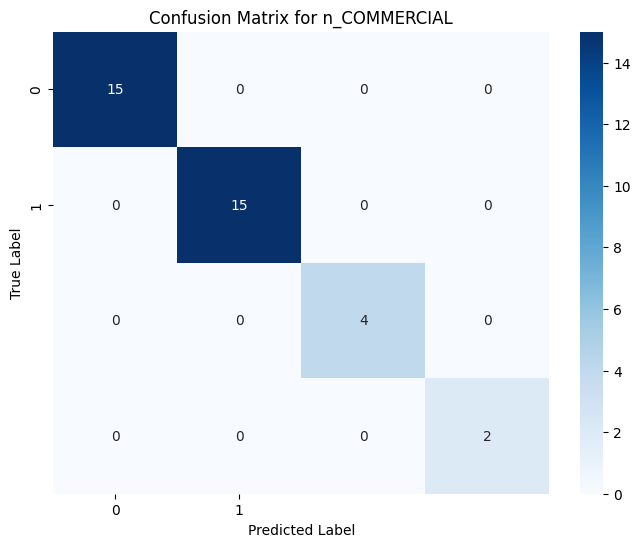

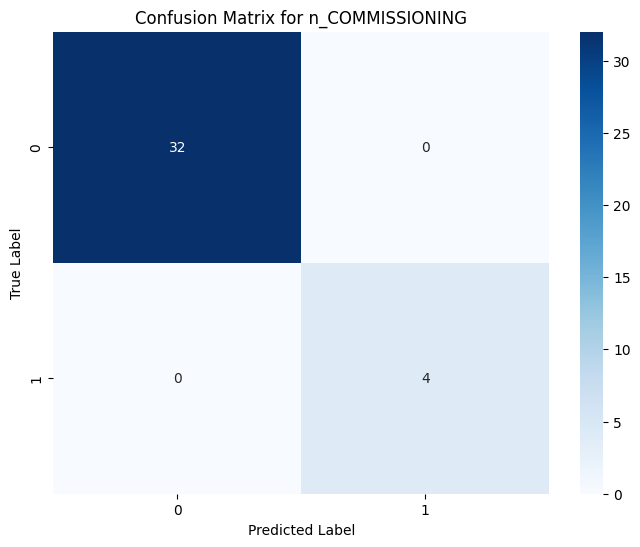

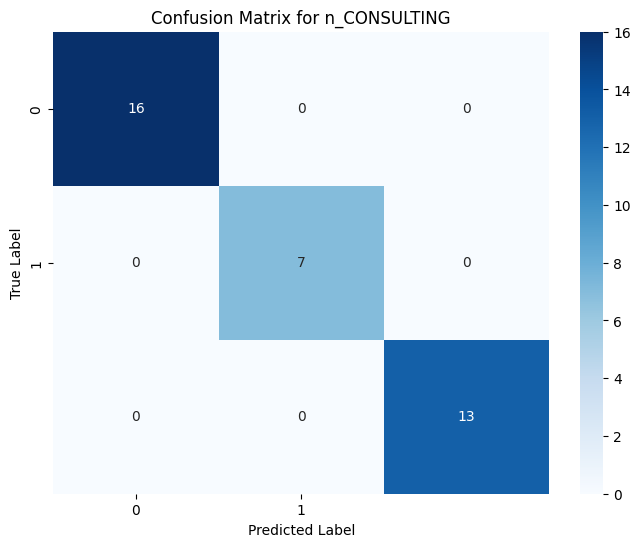

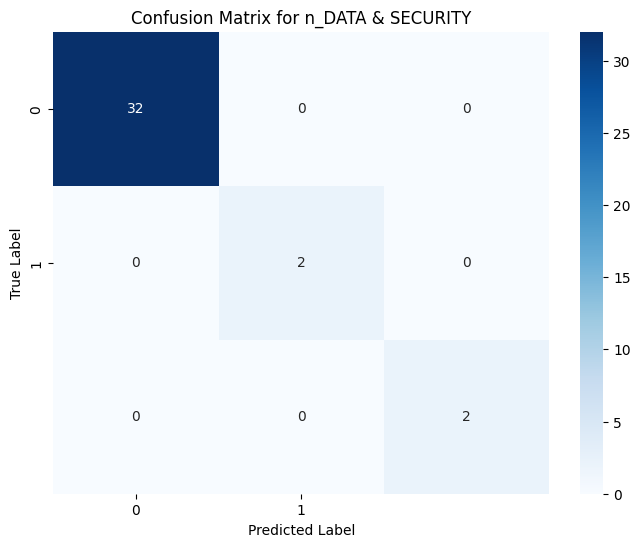

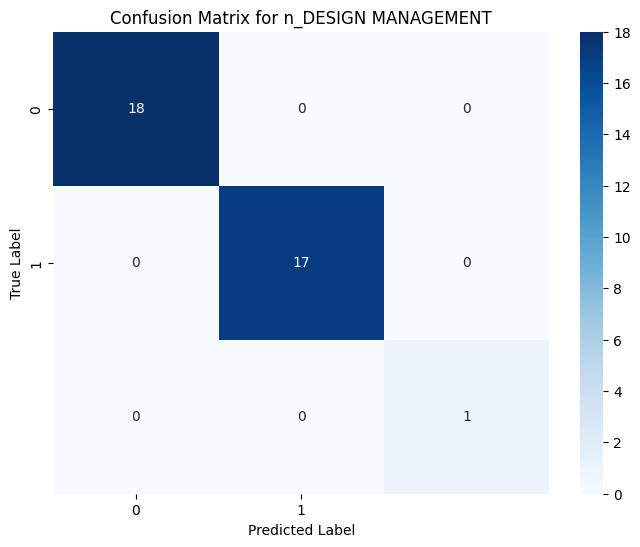

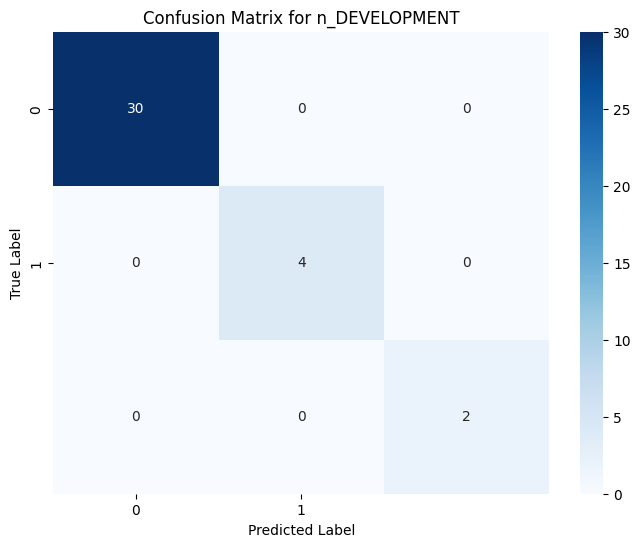

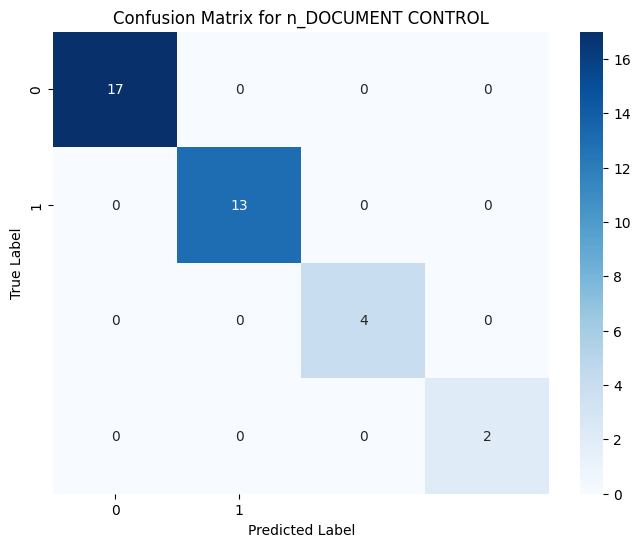

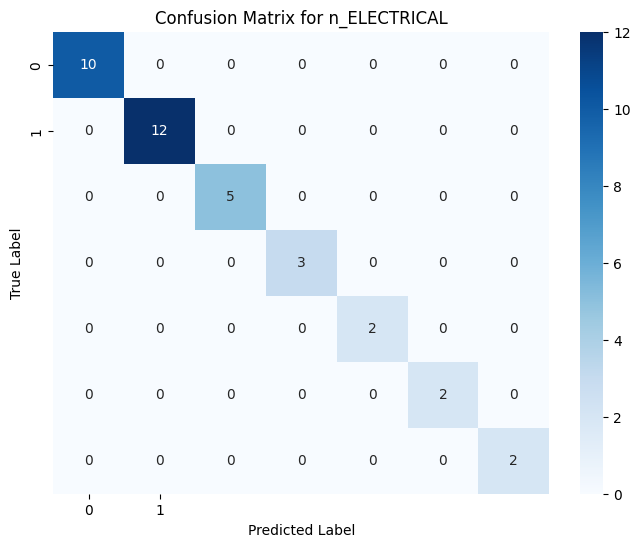

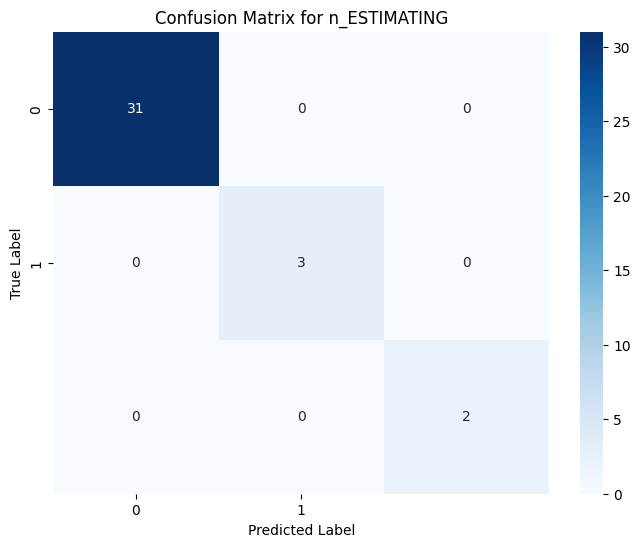

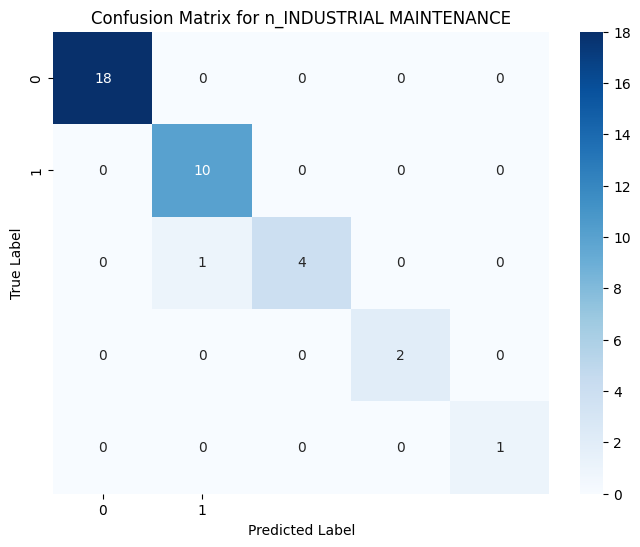

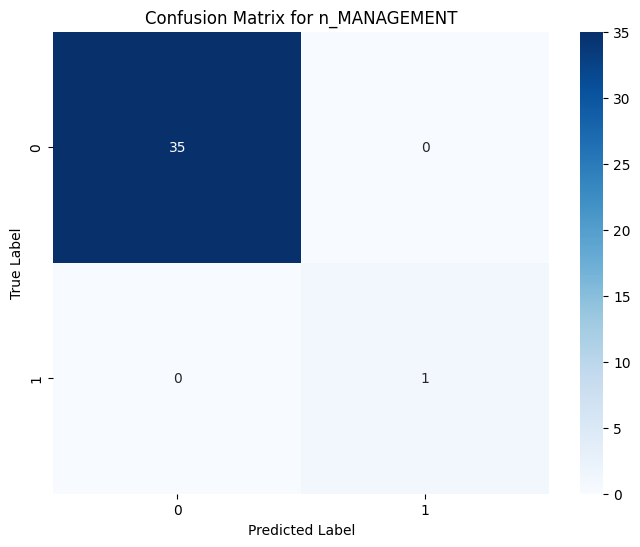

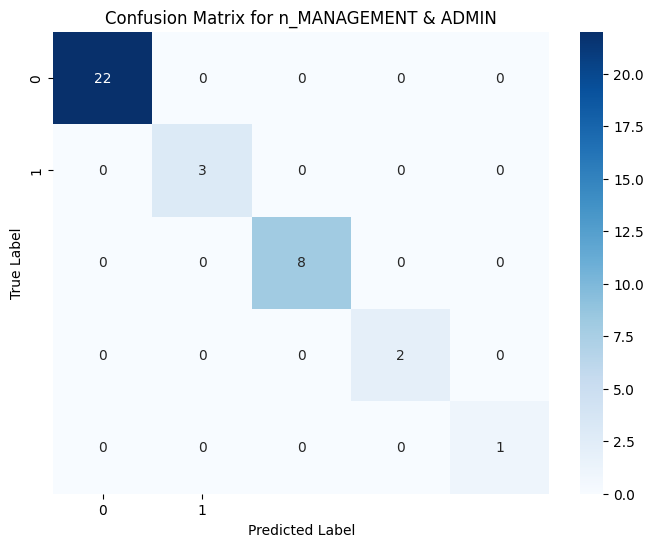

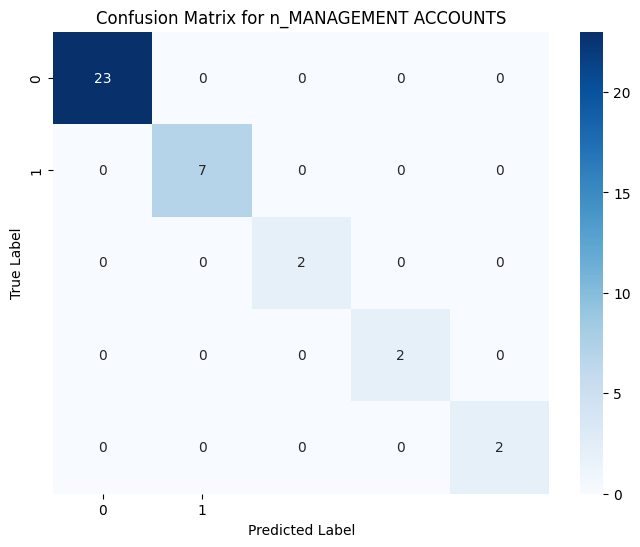

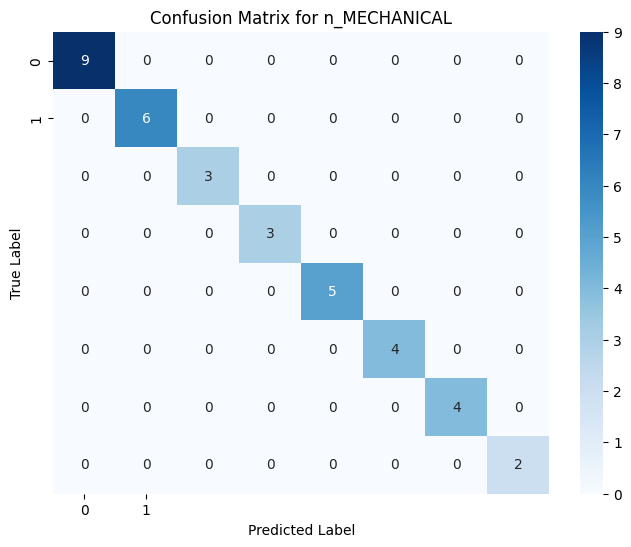

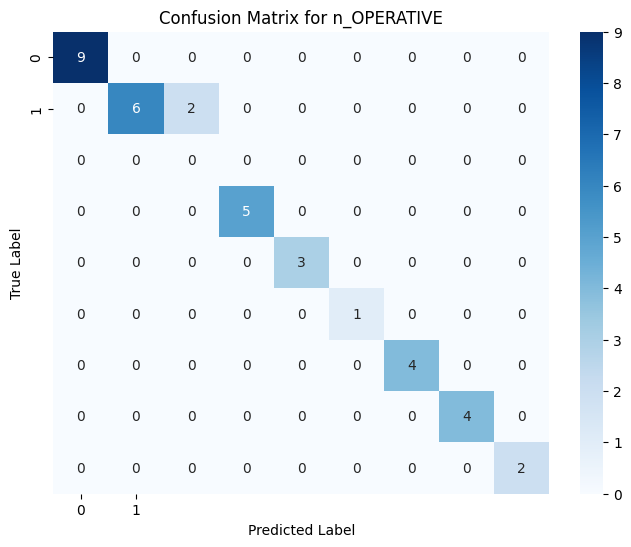

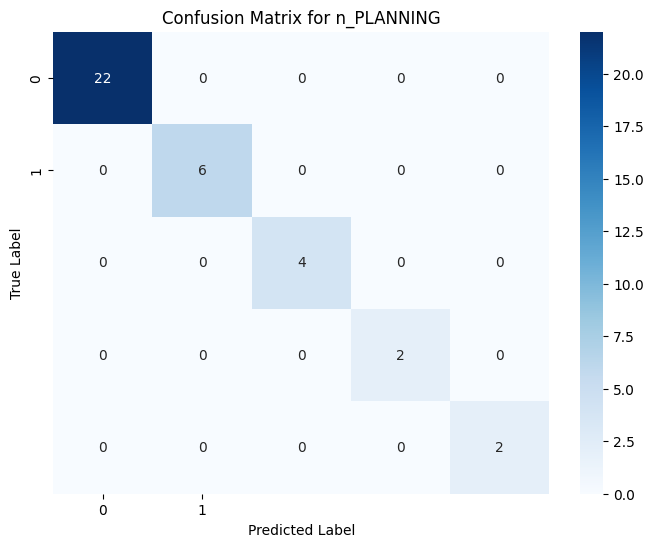

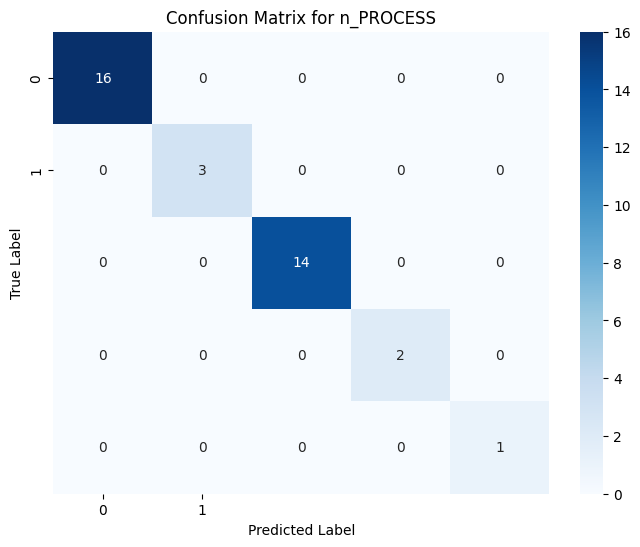

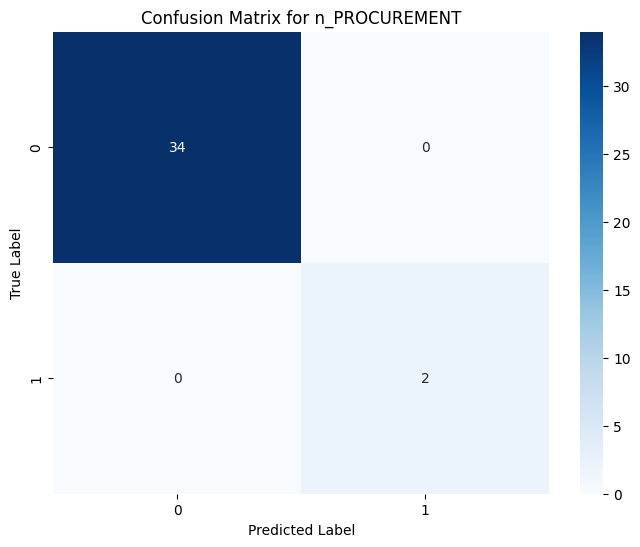

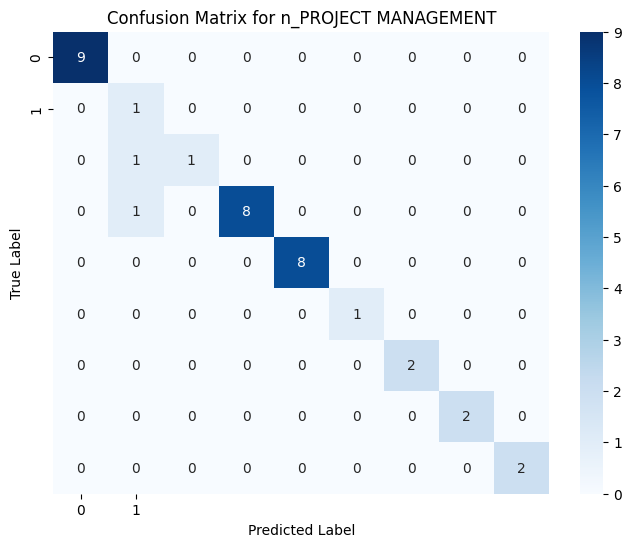

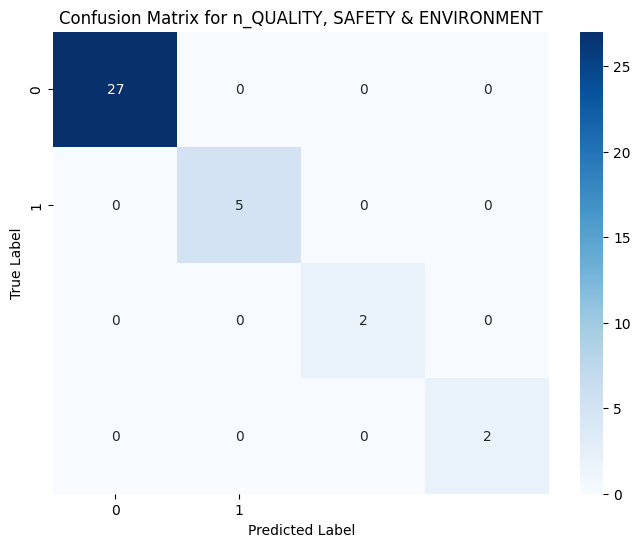

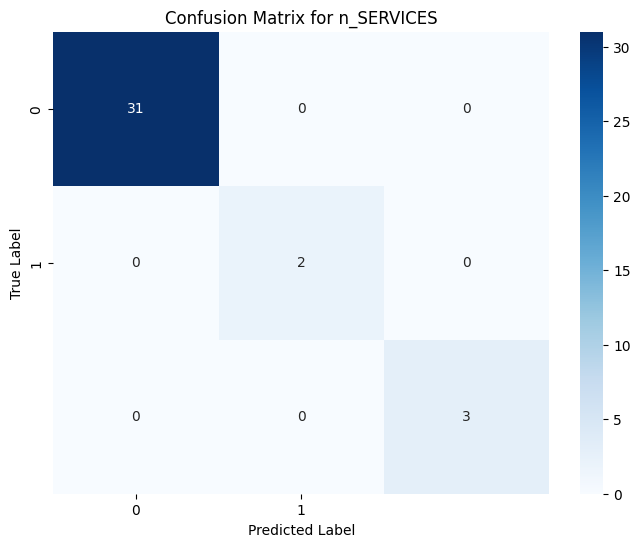

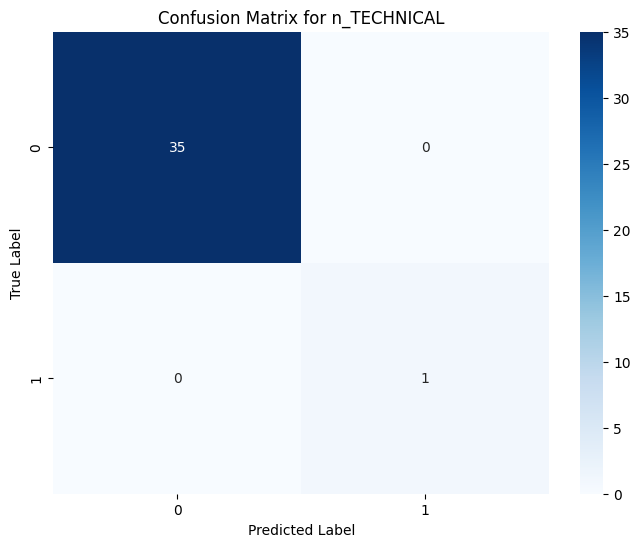

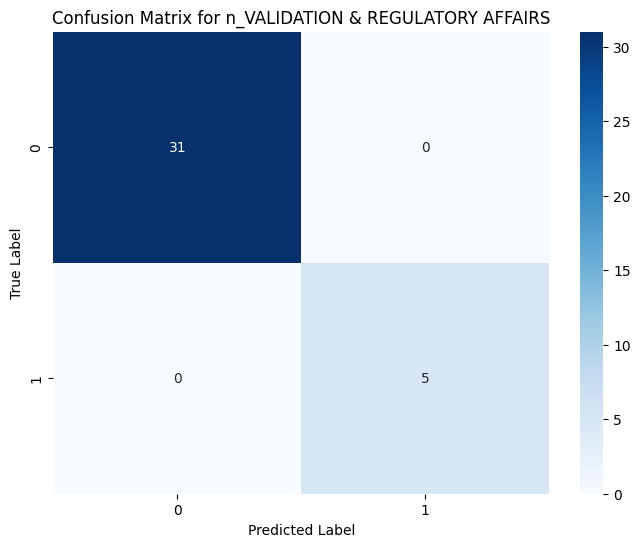

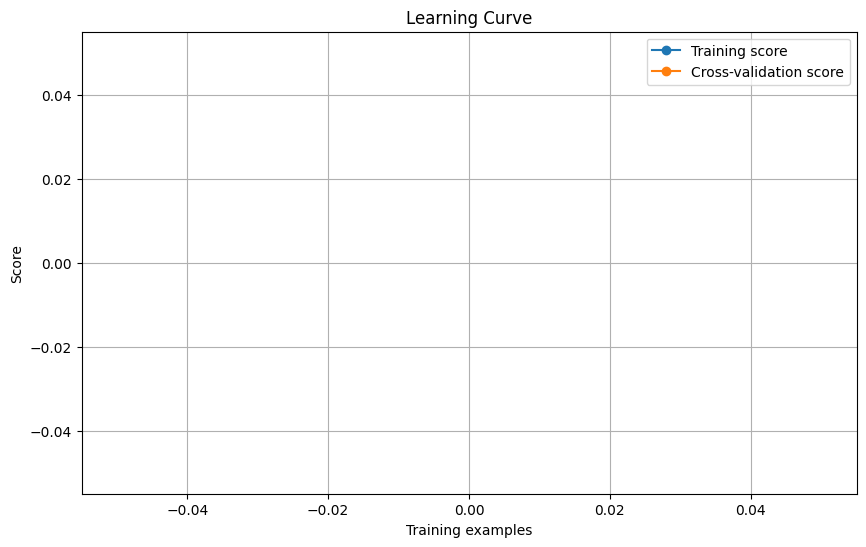

In [284]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import learning_curve

# def plot_confusion_matrix(y_true, y_pred, labels):
#     for i, column in enumerate(labels):
#         cm = confusion_matrix(y_true[:, i], y_pred[:, i])
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
#         plt.title(f'Confusion Matrix for {column}')
#         plt.xlabel('Predicted Label')
#         plt.ylabel('True Label')
#         plt.show()

# # Plot confusion matrix
# plot_confusion_matrix(y_test_array, y_pred, labels=y_test.columns)

# # Learning curve function
# def plot_learning_curve(estimator, X, y, train_sizes, cv):
#     train_sizes, train_scores, test_scores, fit_times, _ = \
#         learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv,scoring='accuracy', return_times=True)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     # Plot learning curve
#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
#     plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1)
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
#     plt.xlabel('Training examples')
#     plt.ylabel('Score')
#     plt.title('Learning Curve')
#     plt.legend(loc='best')
#     plt.grid()
#     plt.show()

# # Plot learning curve
# plot_learning_curve(model4_pipe_cv, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

In [285]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import learning_curve

# # Function to plot learning curve
# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                     train_scores_mean + train_scores_std, alpha=0.1,
#                     color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#             label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#             label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

# # Plot learning curve
# plot_learning_curve(model4_pipe_cv, "Learning Curve", X_train, y_train, cv=10, n_jobs=-1)
# plt.show()


In [255]:
y_train.shape


(144, 24)

In [218]:
y_test.head()

,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS
19,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,8,0,2,0,5,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
153,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0
78,0,0,0,0,0,0,0,1,0,0,23,0,5,0,1,0,0,2,0,0,1,0,1,0
145,1,1,0,2,0,1,0,1,2,0,2,0,2,0,5,3,2,2,0,3,0,0,0,0


In [219]:
y_pred

array([[ 1,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  8,
         0,  2,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  3,  7,  0,  4,  1,  2,  4,  7,  0,  5,  0,  3,  6, 18, 15,
         3,  0,  0, 30,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 23,  0,  5,  0,  1,  0,
         0,  2,  0,  0,  1,  0,  1,  0],
       [ 1,  1,  0,  2,  0,  1,  0,  1,  2,  0,  2,  0,  2,  0,  5,  3,
         2,  2,  0,  3,  0,  0,  0,  0],
       [ 0,  3,  7,  0,  2,  1,  1,  2,  8,  0,  1,  0,  2,  5, 15, 11,
         4,  1,  0, 29,  2,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  2,  0,
         0,  4,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  4,
         1,  3,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  8,
         0,  2,  0,  5, 

In [182]:
y_pred.shape

(36, 24)

In [183]:
y_test.shape

(36, 24)

In [260]:
# Assuming y_pred is a NumPy array
y_pred_df = pd.DataFrame(test_predictions, columns=y_test.columns)

# Display the DataFrame
y_pred_df.head()


,n_ARCHITECTURAL,n_COMMERCIAL,n_COMMISSIONING,n_CONSULTING,n_DATA & SECURITY,n_DESIGN MANAGEMENT,n_DEVELOPMENT,n_DOCUMENT CONTROL,n_ELECTRICAL,n_ESTIMATING,n_INDUSTRIAL MAINTENANCE,n_MANAGEMENT,n_MANAGEMENT & ADMIN,n_MANAGEMENT ACCOUNTS,n_MECHANICAL,n_OPERATIVE,n_PLANNING,n_PROCESS,n_PROCUREMENT,n_PROJECT MANAGEMENT,"n_QUALITY, SAFETY & ENVIRONMENT",n_SERVICES,n_TECHNICAL,n_VALIDATION & REGULATORY AFFAIRS
0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,8,0,2,0,5,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,3,7,0,4,1,2,4,7,0,5,0,3,6,18,15,3,0,0,30,4,0,0,0
3,0,0,0,0,0,0,0,1,0,0,20,0,4,0,1,1,0,2,0,1,1,0,1,0
4,1,1,0,2,0,1,0,1,2,0,2,0,2,0,5,3,2,2,0,3,0,0,0,0


### Testing Model 4

In [100]:
# predicted_departments = predict_departments_from_user_input(model2_pipe_cv_2)

# predicted_departments

In [171]:
import numpy as np

def predict_department_numbers(model4):
    """
    Predict department numbers based on user input and predictions from Model 2.

    Args:
    model2 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 2.
    model4 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 4.

    Returns:
    numpy.ndarray: Predicted department numbers.
    """
    # Get user input for features
    duration_hours = float(input("Enter Duration (in hours): "))
    total_order_intake = float(input("Enter Total Order Intake: "))
    duration_days = float(input("Enter Duration (in days): "))
    num_of_departments = float(input("Enter Number of Departments: "))

    # Calculate derived features
    num_of_employees = float(input("Enter Number of Employees: "))
    duration_to_employees_ratio = duration_hours / num_of_employees
    work_intensity = total_order_intake / duration_hours
    department_diversity = total_order_intake / num_of_departments
    average_work_quantity_per_department = total_order_intake / num_of_departments

    # Prepare input for Model 2
    input_data_model2 = np.array([[duration_hours, total_order_intake, duration_days,num_of_employees,duration_to_employees_ratio,
                                work_intensity, department_diversity,
                                average_work_quantity_per_department]])

    # Make predictions using Model 2
    
    #predicted_departments = predict_departments_from_user_input(model2_pipe_cv_2)
    predicted_departments = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0]]
    
    # Prepare input for Model 4
    input_data_model4 = np.concatenate((input_data_model2, predicted_departments, [[num_of_departments]]), axis=1)

    # Make prediction using Model 4
    predicted_department_numbers = model4.predict(input_data_model4)
    
    print("total employees=", num_of_employees)
    print("total departments=", num_of_departments)
    print("predicted_departments", predicted_departments)
    return predicted_department_numbers

# #Call the function with the trained models for Model 2 and Model 4
# predicted_department_numbers = predict_department_numbers(model4_pipe_cv)
# print("Predicted Department Numbers:", predicted_department_numbers)
# predicted_department_numbers

total employees= 22.0
total departments= 2.0
predicted_departments [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]]
Predicted Department Numbers: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 0 0 0]]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0,
        0, 0]])

This model is successfully classifying the minimum requirement of the employees in the predicted department. Although it is not predicting the 100% , which is a result of huge data imbalance in terms of labels in each departments.

Imbalance cannot be handled beacuse if we oversample in each department label further 90-95% Data will be manipulated

More deperatment data is needed for each label and each class with each department for the model to generalise better

# Final Testing

In [ ]:
# import numpy as np
# from sklearn.metrics import classification_report

# def get_user_input():
#     """
#     Get user input for features.

#     Returns:
#     tuple: A tuple containing user-provided values for duration_hours, total_order_intake, and duration_days.
#     """
#     duration_hours = float(input("Enter Duration (in hours): "))
#     total_order_intake = float(input("Enter Total Order Intake: "))
#     duration_days = float(input("Enter Duration (in days): "))
#     return duration_hours, total_order_intake, duration_days

# def predict_number_of_departments(model, duration_hours, total_order_intake, duration_days):
#     """
#     Predict number of departments based on user input using the provided model.

#     Args:
#     model (sklearn.pipeline.Pipeline): Trained pipeline model.
#     duration_hours (float): Duration in hours.
#     total_order_intake (float): Total order intake.
#     duration_days (float): Duration in days.

#     Returns:
#     int: Predicted number of departments for the user-provided input.
#     """
#     work_intensity = total_order_intake / duration_hours
#     input_data = np.array([[duration_hours, total_order_intake, duration_days, work_intensity]])
#     predicted_number_of_departments = model.predict(input_data)
#     return predicted_number_of_departments

# def predict_departments(model, duration_hours, total_order_intake, duration_days):
#     """
#     Predict departments based on user input using the provided model.

#     Args:
#     model (sklearn.pipeline.Pipeline): Trained pipeline model.
#     duration_hours (float): Duration in hours.
#     total_order_intake (float): Total order intake.
#     duration_days (float): Duration in days.

#     Returns:
#     numpy.ndarray: Predicted departments for the user-provided input.
#     """
#     num_of_departments = int(predict_number_of_departments(model, duration_hours, total_order_intake, duration_days))
#     work_intensity = total_order_intake / duration_hours
#     department_diversity = total_order_intake / num_of_departments
#     average_work_quantity_per_department = total_order_intake / num_of_departments
#     input_data = np.array([[duration_hours, total_order_intake, duration_days,
#                         work_intensity, department_diversity,
#                         average_work_quantity_per_department, num_of_departments]])
    
#     # Make predictions using the model
#     predictions = model.predict(input_data)

#     # Implement logic to select the top N departments based on all input features
#     department_predictions = predictions.copy()
#     for i, probabilities in enumerate(predictions):
#         num_departments = int(input_data[i][-1])  # Assuming the last feature is 'Num_of_Departments'
#         top_n_departments_idx = np.argsort(probabilities)[::-1][:num_departments]
#         department_predictions[i, :] = 0  # Reset all predictions
#         department_predictions[i, top_n_departments_idx] = 1  # Set top N predictions to 1

#     return department_predictions

# def predict_number_of_employees(model2, model3, duration_hours, total_order_intake, duration_days):
#     """
#     Predict number of employees based on user input and predictions from Model 2.

#     Args:
#     model2 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 2.
#     model3 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 3.
#     duration_hours (float): Duration in hours.
#     total_order_intake (float): Total order intake.
#     duration_days (float): Duration in days.

#     Returns:
#     int: Predicted number of employees.
#     """
#     predicted_departments = predict_departments(model2, duration_hours, total_order_intake, duration_days)
#     input_data_model3 = np.concatenate((np.array([[duration_hours, total_order_intake, duration_days]]), predicted_departments), axis=1)
#     predicted_number_of_employees = model3.predict(input_data_model3)
#     return predicted_number_of_employees

# def predict_department_numbers(model2, model4, duration_hours, total_order_intake, duration_days):
#     """
#     Predict department numbers based on user input and predictions from Model 2.

#     Args:
#     model2 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 2.
#     model4 (sklearn.pipeline.Pipeline): Trained pipeline model for Model 4.
#     duration_hours (float): Duration in hours.
#     total_order_intake (float): Total order intake.
#     duration_days (float): Duration in days.

#     Returns:
#     numpy.ndarray: Predicted department numbers.
#     """
#     predicted_departments = predict_departments(model2, duration_hours, total_order_intake, duration_days)
#     input_data_model4 = np.concatenate((np.array([[duration_hours, total_order_intake, duration_days]]), predicted_departments), axis=1)
#     predicted_department_numbers = model4.predict(input_data_model4)
#     return predicted_department_numbers

# # Get user input
# duration_hours, total_order_intake, duration_days = get_user_input()

# # Call the testing functions with the trained models
# predicted_number_of_departments = predict_number_of_departments(model1_pipe_cv_1, duration_hours, total_order_intake, duration_days)
# print("Predicted Number of Departments:", predicted_number_of_departments)

# predicted_departments = predict_departments(model2_pipe_cv_2, duration_hours, total_order_intake, duration_days)
# print("Predicted Departments:", predicted_departments)

# predicted_number_of_employees = predict_number_of_employees(model2_pipe_cv_2, model3_pipe_cv, duration_hours, total_order_intake, duration_days)
# print("Predicted Number of Employees:", predicted_number_of_employees)

# predicted_department_numbers = predict_department_numbers(model2_pipe_cv_2, model4_pipe_cv, duration_hours, total_order_intake, duration_days)
# print("Predicted Department Numbers:", predicted_department_numbers)


### Testing Model 4

# Model Deployment

#### Saving the trained models

In [102]:
import pickle

In [135]:
# Predicting the Number of departments for new project
pickle.dump(model1_pipe_cv_1, open('model1_pipe_cv.pkl','wb'))

In [104]:
loaded_model1 = pickle.load(open('model1_pipe_cv.pkl','rb'))
loaded_model1

Pipeline(steps=[('scaler_1_1', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=9, min_samples_split=7,
                                        n_estimators=117, random_state=42))])

In [158]:
# Predicting the Number of departments for new project 
pickle.dump(model2_pipe_cv_2, open('model2_pipe_cv.pkl','wb'))

In [159]:
loaded_model2 = pickle.load(open('model2_pipe_cv.pkl','rb'))
loaded_model2

Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=14,
                                                                        n_estimators=197,
                                                                        random_state=42),
                                       n_jobs=-1))])

In [107]:
# Predicting the Number of departments for new project 
pickle.dump(model3_pipe_cv, open('model3_pipe_cv.pkl','wb'))

In [108]:
loaded_model3 = pickle.load(open('model3_pipe_cv.pkl','rb'))
loaded_model3

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=11, n_estimators=64,
                                       random_state=42))])

In [109]:
# Predicting the Number of departments for new project 
pickle.dump(model4_pipe_cv, open('model4_pipe_cv.pkl','wb'))

In [110]:
loaded_model4 = pickle.load(open('model4_pipe_cv.pkl','rb'))
loaded_model4

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=14,
                                                                        n_estimators=197,
                                                                        random_state=42),
                                       n_jobs=-1))])